In [1]:
# Add higher directory to python modules path

import sys

sys.path.append("..")

In [2]:
import os
import glob

import pandas as pd

from seaborn import clustermap
import matplotlib.pyplot as plt

from modules.hmm import get_hits, get_seqs

In [3]:

import seaborn as sns
sns.set(font_scale=0.25)

In [63]:
DATA_DIR = "../data/runs/aquificota/2024-09-29/"

E_VALUE_THR = 1e-5
CORE_THR = 0.95
PRESENCE_THR = 0.10

CLUSTERMAP_METHOD = "ward"
CLUSTERMAP_METRIC = "jaccard"

In [5]:
hits_path = os.path.join(
    DATA_DIR,
    "HighQ_Aquificota_Sequences_AA_hmmer.txt"
)
seqs_path = os.path.join(
    DATA_DIR,
    "HighQ_Aquificota_Sequences_AA.fa"
)

hits_df = get_hits(hits_path)
seqs_df = get_seqs(seqs_path)

hits_df = pd.merge(
    left=hits_df,
    right=seqs_df.rename(columns={"seq_id": "target_name"}),
    how="left",
    on="target_name"
)

# Create MAG and gene caller ID columns
hits_df["mag"] = hits_df["target_name"]\
    .str.split("_").str[:-1]\
    .apply(lambda row: "_".join(row))
hits_df["gene_caller_id"] = hits_df["target_name"]\
    .str.split("_").str[-1]

hits_df

,target_name,target_accession,query_name,query_accession,e_value_full_seq,score_full_seq,bias_full_seq,e_value_best_dom,score_best_dom,bias_best_dom,...,clu,ov,env,dom,rep,inc,description_of_target,seq,mag,gene_caller_id
0,Persephonella_sp_M17_metabat2_scaf2bin_002_257,-,baker_rubisco_form_IV_alignment,-,8.700000e-108,364.4,0.0,9.800000e-108,364.3,0.0,...,0,0,1,1,1,1,-,MNYIEVTYLLTTKQHVDPEKKAEELAISLSIGGWGDLSENKRKNLE...,Persephonella_sp_M17_metabat2_scaf2bin_002,257
1,Persephonella_sp_A1_metabat2_scaf2bin_131_1263,-,baker_rubisco_form_IV_alignment,-,1.800000e-107,363.4,0.0,2.000000e-107,363.2,0.0,...,0,0,1,1,1,1,-,MNYIEVTYLLTSKKHIEPEKKAEELAISLSIGGWGDLPENKRKKLE...,Persephonella_sp_A1_metabat2_scaf2bin_131,1263
2,Aquificota_bacterium_L_MetaBat_11_1112,-,baker_rubisco_form_IV_alignment,-,1.700000e-104,353.6,0.0,1.900000e-104,353.4,0.0,...,0,0,1,1,1,1,-,MNYIEVTYLLTTKEEINPEEKAKEIAISLSIGGTGDLPPEKIKELE...,Aquificota_bacterium_L_MetaBat_11,1112
3,Hydrogenothermaceae_bacterium_134_614_metabat2...,-,baker_rubisco_form_IV_alignment,-,4.500000e-104,352.2,0.0,5.000000e-104,352.1,0.0,...,0,0,1,1,1,1,-,MNYINVTYLLSSNKKFNVEEKAKRLAEELTIGSENNLRFNPKLKTY...,Hydrogenothermaceae_bacterium_134_614_metabat2...,573
4,Hydrogenothermaceae_bacterium_S141_maxbin2_sca...,-,baker_rubisco_form_IV_alignment,-,4.400000e-85,289.7,0.0,4.900000e-85,289.5,0.0,...,0,0,1,1,1,1,-,MNYIEAMYLIISDRKFDIEERAEELKRDVYIWNEKNYISDKERLRN...,Hydrogenothermaceae_bacterium_S141_maxbin2_sca...,1167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250276,Aquificaceae_bacterium_T2_maxbin2_scaf2bin_342...,-,metascan_WP_013516312.1,KO:K17052,1.300000e-10,45.2,0.0,1.900000e-10,44.8,0.0,...,0,0,1,1,1,1,-,MRYIGLFLLLTLATVFSGNVENGKKIYDQWCAQCHGYEGDGMGYAE...,Aquificaceae_bacterium_T2_maxbin2_scaf2bin_342,790
1250277,Aquificaceae_bacterium_S141_87_esom_1070,-,metascan_WP_013516312.1,KO:K17052,1.100000e-09,42.3,0.4,1.300000e-09,42.0,0.4,...,0,0,1,1,1,1,-,IHPNYAYDWYPHAKPPYKYPEDWANQYALAYIGGEKVFRKNTFKTP...,Aquificaceae_bacterium_S141_87_esom,1070
1250278,Aquificaceae_bacterium_354_166_metabat1_scaf2b...,-,metascan_WP_013516312.1,KO:K17052,1.300000e-06,32.2,0.0,2.000000e-06,31.6,0.0,...,0,0,1,1,1,1,-,MKYIGLFLLLILSTVFAGNAENGKKIYDQWCAQCHGYEGEGNGYAA...,Aquificaceae_bacterium_354_166_metabat1_scaf2b...,656
1250279,Persephonella_sp_PIR_30_metabat2_scaf2bin_079_...,-,metascan_WP_013516312.1,KO:K17052,5.100000e-03,20.4,0.0,5.800000e-03,20.2,0.0,...,0,0,1,1,1,1,-,MNRGLKAGLLGLSLIAFTATAGEKEFFKYEVINGKYVEGEISADPD...,Persephonella_sp_PIR_30_metabat2_scaf2bin_079,1582


In [6]:
# Filter by e-value threshold
hits_df = hits_df[hits_df["e_value_full_seq"] <= E_VALUE_THR]

# Get only those hits with the lowest E-value
hits_df_min = hits_df.loc[
    hits_df.groupby("target_name")["e_value_full_seq"].idxmin()
].reset_index(drop=True)

del hits_df

hits_df_min

,target_name,target_accession,query_name,query_accession,e_value_full_seq,score_full_seq,bias_full_seq,e_value_best_dom,score_best_dom,bias_best_dom,...,clu,ov,env,dom,rep,inc,description_of_target,seq,mag,gene_caller_id
0,Aquifex_aeolicus_HyVt_501_1001,-,metascan_A0A023X3G8,KO:K01560,1.300000e-09,42.3,0.0,3.300000e-06,31.1,0.0,...,0,0,3,3,2,1,-,MLTLLIDMDGVLTRDKEFTPFDYAPAFIRHLKERGIPFRIVSNNST...,Aquifex_aeolicus_HyVt_501,1001
1,Aquifex_aeolicus_HyVt_501_1015,-,magiclamp_wsp_GGDEF,PF00990.21,8.500000e-41,143.4,0.0,1.200000e-40,142.9,0.0,...,0,0,1,1,1,1,-,MILEYAAYESLLLSALALAAVLFSVLRRGLRELALMASGFLLLAFS...,Aquifex_aeolicus_HyVt_501,1015
2,Aquifex_aeolicus_HyVt_501_1022,-,metabolic_TIGR01054,TIGR01054,1.500000e-52,182.4,3.6,8.400000e-52,179.9,3.6,...,1,0,1,1,1,1,-,VDKRTEKIVSPRPFITSSLQSEANARLGFSPEKTQTLAQTLYEQGS...,Aquifex_aeolicus_HyVt_501,1022
3,Aquifex_aeolicus_HyVt_501_1038,-,magiclamp_iron_aquisition-siderophore_transpor...,PF02472.11,3.900000e-13,53.7,0.1,4.900000e-13,53.4,0.1,...,0,0,1,1,1,1,-,MNLRRRARLGADERAYIDVVPLVDTLLAVFLFLGVLAFQAPLTFLA...,Aquifex_aeolicus_HyVt_501,1038
4,Aquifex_aeolicus_HyVt_501_1039,-,magiclamp_iron_aquisition-siderophore_transpor...,PF01618.11,1.500000e-30,109.8,0.8,1.800000e-30,109.5,0.8,...,0,0,1,1,1,1,-,MEGAFGQIIDLIRKGGVVMYPLIILSVISWVFIVERIVNLRVSQFL...,Aquifex_aeolicus_HyVt_501,1039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48859,uncultured_Aquificaceae_bacterium_S1_Bin_MAXBI...,-,magiclamp_circ_HATPase_c,PF02518.26,2.400000e-21,80.3,0.0,8.400000e-21,78.5,0.0,...,0,0,2,2,1,1,-,MGNRKDQKLQESYVATDIKAITGLEHVRLRPSMYIGDVGERGLHHL...,uncultured_Aquificaceae_bacterium_S1_Bin_MAXBI...,982
48860,uncultured_Aquificaceae_bacterium_S1_Bin_MAXBI...,-,magiclamp_iron_aquisition-siderophore_synthesi...,-,5.400000e-51,177.5,0.0,6.700000e-51,177.2,0.0,...,0,0,1,1,1,1,-,MLNPEILEKWDKEYFWHPFTQMKVYREEENLIFERGEGIYLYDIKG...,uncultured_Aquificaceae_bacterium_S1_Bin_MAXBI...,985
48861,uncultured_Aquificaceae_bacterium_S1_Bin_MAXBI...,-,barosa_PirA-siderophore_receptor-rep,-,9.500000e-06,28.2,0.0,1.300000e-05,27.8,0.0,...,0,0,1,1,1,1,-,MSSNFRIHKHTNQSLTPPVTHRTPPFNLSIFRDNINVLIDDAEVHG...,uncultured_Aquificaceae_bacterium_S1_Bin_MAXBI...,988
48862,uncultured_Aquificaceae_bacterium_S1_Bin_MAXBI...,-,barosa_FeoB_N,PF02421.13,6.200000e-09,39.5,0.2,2.700000e-08,37.4,0.2,...,1,0,1,1,1,1,-,MIKQREPIVAIATPFGESAIGAIRLSGLGVLEKIKDLLIMKGEPKP...,uncultured_Aquificaceae_bacterium_S1_Bin_MAXBI...,991


In [19]:
# Presence/abscence (remove for having the counts of many-vs-many)
heat_df = hits_df_min[["mag", "query_name"]].copy()

heat_df = heat_df.rename(columns={"query_name": "profile"})
heat_df = heat_df\
    .value_counts()\
    .reset_index(drop=False)\
    .rename(columns={0: "count"})

# Add collumn for displaying presence/absence
heat_df["presence"] = heat_df["count"].apply(lambda row: int(bool(row)))

# Filter profiles
heat_df["source"] = heat_df["profile"].str.split("_").str[0]

heat_df = heat_df.pivot(
    index="mag",
    columns="profile",
    values="presence"
)

# Format columns
heat_df.columns = heat_df.columns.str.replace("barosa.source.hmm_", "barosa_")

# Fill NaNs
heat_df = heat_df.fillna(0.0)

heat_df

profile,baker_/export/uec-gs1/pdthomas/panther/famlib/rel/PANTHER10.0/books/PTHR10632/hmmer.hmm,baker_Hydrogenase_Vignais_Group_1_alignment,baker_NrfA_PF02335_full,baker_TIGR00339,baker_TIGR00455,baker_TIGR01282,baker_TIGR01286,baker_TIGR01287,baker_TIGR01473,baker_TIGR01580,...,metascan_WP_012675774,metascan_WP_013129492,metascan_WP_013516312.1,metascan_WP_013637988,metascan_WP_016268012,metascan_WP_018133527,metascan_WP_022739883,metascan_WP_022846160,metascan_WP_023457248,metascan_X4ZVJ5
mag,,,,,,,,,,,,,,,,,,,,,
Aquifex_aeolicus_HyVt_501,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Aquifex_aeolicus_SZUA_1413,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Aquifex_aeolicus_SZUA_1501,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
Aquifex_aeolicus_SZUA_1519,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
Aquifex_aeolicus_VF5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Thermovibrio_sp_S012_127_esom,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
Thermovibrio_sp_S141_83,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
Venenivibrio_stagnispumantis_DSM_18763,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [20]:
# Get correct HMM model name mapping

hmm_mapping = {}

for hmm_path in glob.glob("../data/profiles/barosa/*.hmm"):
    hmm_filename = os.path.basename(hmm_path)

    with open(hmm_path, mode="r") as handle:
        hmm_name = handle.readlines()[1]\
            .replace("NAME  ", "")\
            .replace("\n", "")

        hmm_mapping[hmm_filename] = hmm_name

hmm_mapping

{'FbpC-iron_uptake_ATPase-rep.hmm': 'FbpC-iron_uptake_ATPase-rep',
 'nife-group-3c.hmm': 'nife-group-3c.mafft',
 'nitrite_reductase_nirS.hmm': 'nirS_alignment',
 'K19713.hmm': 'K19713',
 'K05919.hmm': 'K05919',
 'PF02335.hmm': 'PF02335_full',
 'IroC-salmochelin_transport-rep.hmm': 'IroC-salmochelin_transport-rep',
 'methylenetetrahydrofolate_dehydrogenase.hmm': 'PRK14186.1',
 'rubisco_form_I_CBB.hmm': 'rubisco_form_I_alignment',
 'sulfide_quinone_oxidoreductase_sqr.hmm': 'sqr_alignment',
 'TIGR02294_1.hmm': 'nickel_nikA',
 'assimilatory_nitrate_reductase_nasA.hmm': 'assimilatory_nitrate_reductase_nasA.hmm',
 '2_oxoglutarate_synthase.hmm': 'PRK09627.1',
 'Sid_FpvG_iron_reductase_PA2403_Paeruginosa_PAO1_180602.hmm': 'Sid_FpvG_iron_reductase_PA2403_Paeruginosa_PAO1_180602',
 'TIGR02882.hmm': 'TIGR02882',
 'wpA.hmm': 'PRK04168.1',
 'OmcZ.hmm': 'OmcZ',
 'TIGR02930.hmm': 'TIGR02930',
 'asrA.hmm': 'TIGR02910',
 'pmoB.hmm': 'K10945',
 'FoxZ.hmm': 'FoxZ',
 'FmnB.hmm': 'FmnB',
 'sulfocyanin.hmm'

In [33]:
metadata_df = pd.read_excel(
    os.path.join(
        "../data/",
        "Aquificota_Revised_Biogeochem_genes.xlsx"
    ),
    sheet_name="Revised_biogeochem",
    engine="openpyxl"
)

metadata_df = metadata_df\
    .dropna(how="all", axis=0)\
    .dropna(how="all", axis=1)

# Fix HMM names
metadata_df = metadata_df.rename(columns={"hmm model": "hmm_model"})
metadata_df["hmm_model"] = metadata_df["hmm_model"].map(hmm_mapping)

# Format cycle column
metadata_df["Cycle"] = metadata_df["Cycle"].str.strip()

# Format HMM column to fit file format
metadata_df["hmm_model"] = metadata_df["hmm_model"]\
    .apply(lambda row: f"barosa_{row.replace('.hmm', '')}")

metadata_df["cycle_colors"] = metadata_df["Cycle"].map({
 "Arsenic": "#e8c5aaff",     
    "Carbon": "#75a56bff",        
    "Methane": "#e8dfe2ff",       
    "Nitrogen": "#386b9aff",      
    "Oxygen": "#b9a3cbff",        
    "Photosynthesis": "#7fd68bff",
    "Sulfur": "#edd970ff",        
    "Hydrogen": "#8EC3E6",     
    "Iron": "#861f2bff",         
    "Selenium": "#a78873ff",     
    "Transporters": "#F4A261"   
})
cycle_colors = metadata_df\
    .set_index("hmm_model")["cycle_colors"]\
    .rename("Cycle")
cycle_colors

hmm_model
barosa_arsC_glut                                                                                  #e8c5aaff
barosa_arsC_thio                                                                                  #e8c5aaff
barosa_arxA                                                                                       #e8c5aaff
barosa_aioA                                                                                       #e8c5aaff
barosa_K03520                                                                                     #75a56bff
                                                                                                    ...    
barosa_Sid_LbtC_Legiobactin_PAP2_superfamily_Legionella_oakridgensis_AHE65915.1_180604            #861f2bff
barosa_Sid_PvdT_Pyoverdine_export_Paeruginosa_PA2390_180623                                       #861f2bff
barosa_Sid_VabS_Vanchrobactin_Export_Vibrio_anguillarum_CAJ45638.1_180623                         #861f2bff
barosa_Sid_YqjH_NA

In [10]:
tax_df = pd.read_csv(
    os.path.join(
        "../data/",
        "Aquificota_gtdb_classification.csv"
    )
)
tax_df["Genomes"] = tax_df["Genomes"].str.split("\\td__").str[0]
tax_df["Family"] = tax_df["Family"].str.split("__").str[-1]
tax_df["Family"] = tax_df["Family"].map({
    "Aquificaceae": "#f0ba7cff",
    "Desulfurobacteriaceae": "#E07A5F",
    "DSM-5069": "white",
    "Hydrogenothermaceae": "#81B29A",
    "QOAS01": "#3D405B",
    "Thermotogaceae": "white"
})
family_colors = tax_df.set_index("Genomes")["Family"]
family_colors

Genomes
Aquifex_aeolicus_HyVt_501                                     #f0ba7cff
Aquifex_aeolicus_SZUA_1413                                    #f0ba7cff
Aquifex_aeolicus_SZUA_1501                                      #3D405B
Aquifex_aeolicus_SZUA_1519                                      #3D405B
Aquifex_aeolicus_VF5                                          #f0ba7cff
                                                                ...    
Thermovibrio_sp_S012_127_esom                                   #E07A5F
Thermovibrio_sp_S141_83                                         #E07A5F
Venenivibrio_stagnispumantis_DSM_18763                          #81B29A
unclassified_Aquificaceae_Obs3_genome_041_Obs3_genome_041     #f0ba7cff
uncultured_Aquificaceae_bacterium_S1_Bin_MAXBIN__048_sub_1    #f0ba7cff
Name: Family, Length: 175, dtype: object

## Clustermaps

In [ ]:
selected_models = ["barosa"]

heat_df_selected = heat_df[
    heat_df.columns[
        heat_df.columns.str.startswith(tuple(selected_models))
    ]
]

In [ ]:
core_hmms = heat_df_selected.columns[
    (heat_df_selected == 1).mean() >= CORE_THR
]
heat_df_selected[core_hmms].columns.tolist()

['barosa_DmkB',
 'barosa_FbpC-iron_uptake_ATPase-rep',
 'barosa_FeoA',
 'barosa_FeoB_N',
 'barosa_FutC-iron_ABC_transporter_ATPase-rep',
 'barosa_K00030',
 'barosa_K01681',
 'barosa_K20140',
 'barosa_MDH_euk_gproteo',
 'barosa_PRK09231.1',
 'barosa_PRK14186.1',
 'barosa_fadh2',
 'barosa_mgtE',
 'barosa_nickel_nikA',
 'barosa_nife-group-4a-g.mafft']

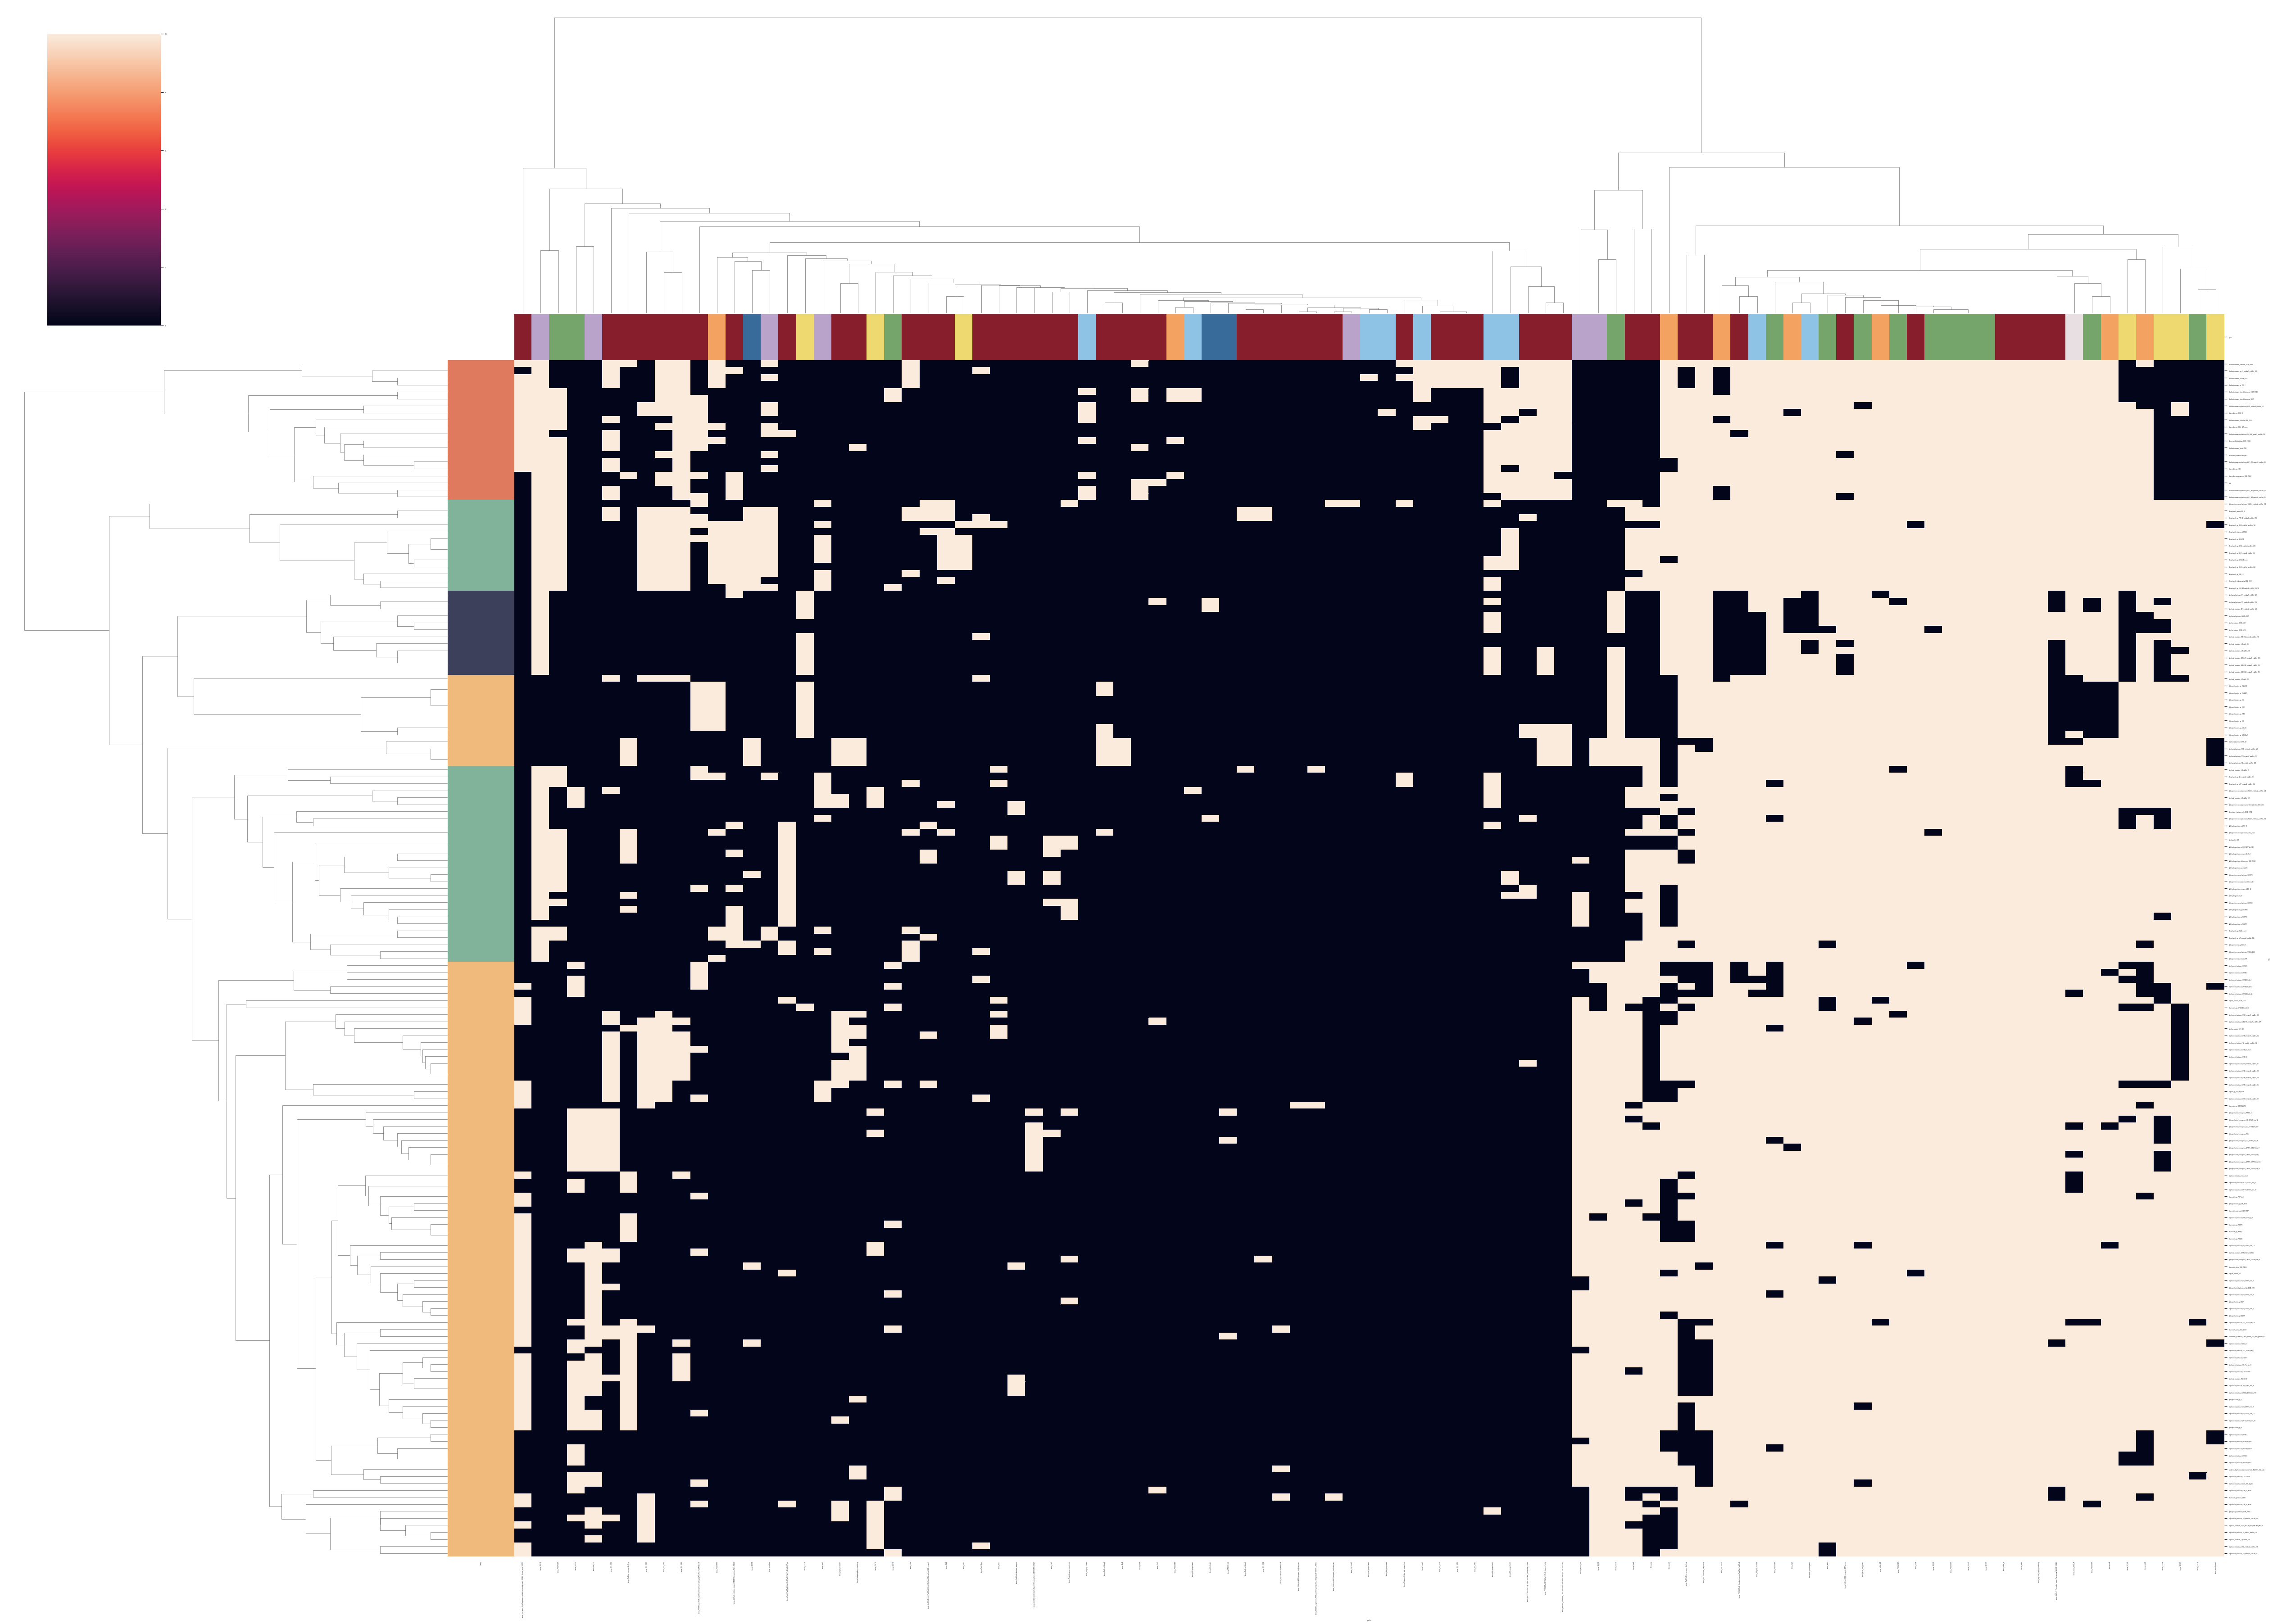

In [11]:
clustermap(
    data=heat_df_selected,
    method=CLUSTERMAP_METHOD,
    metric=CLUSTERMAP_METRIC,
    row_colors=family_colors,
    col_colors=cycle_colors,
    figsize=(70, 50)
)
plt.savefig(
    os.path.join(
        DATA_DIR,
        f"heatmap-{'-'.join(selected_models)}.svg"
    ),
    # dpi=600
)

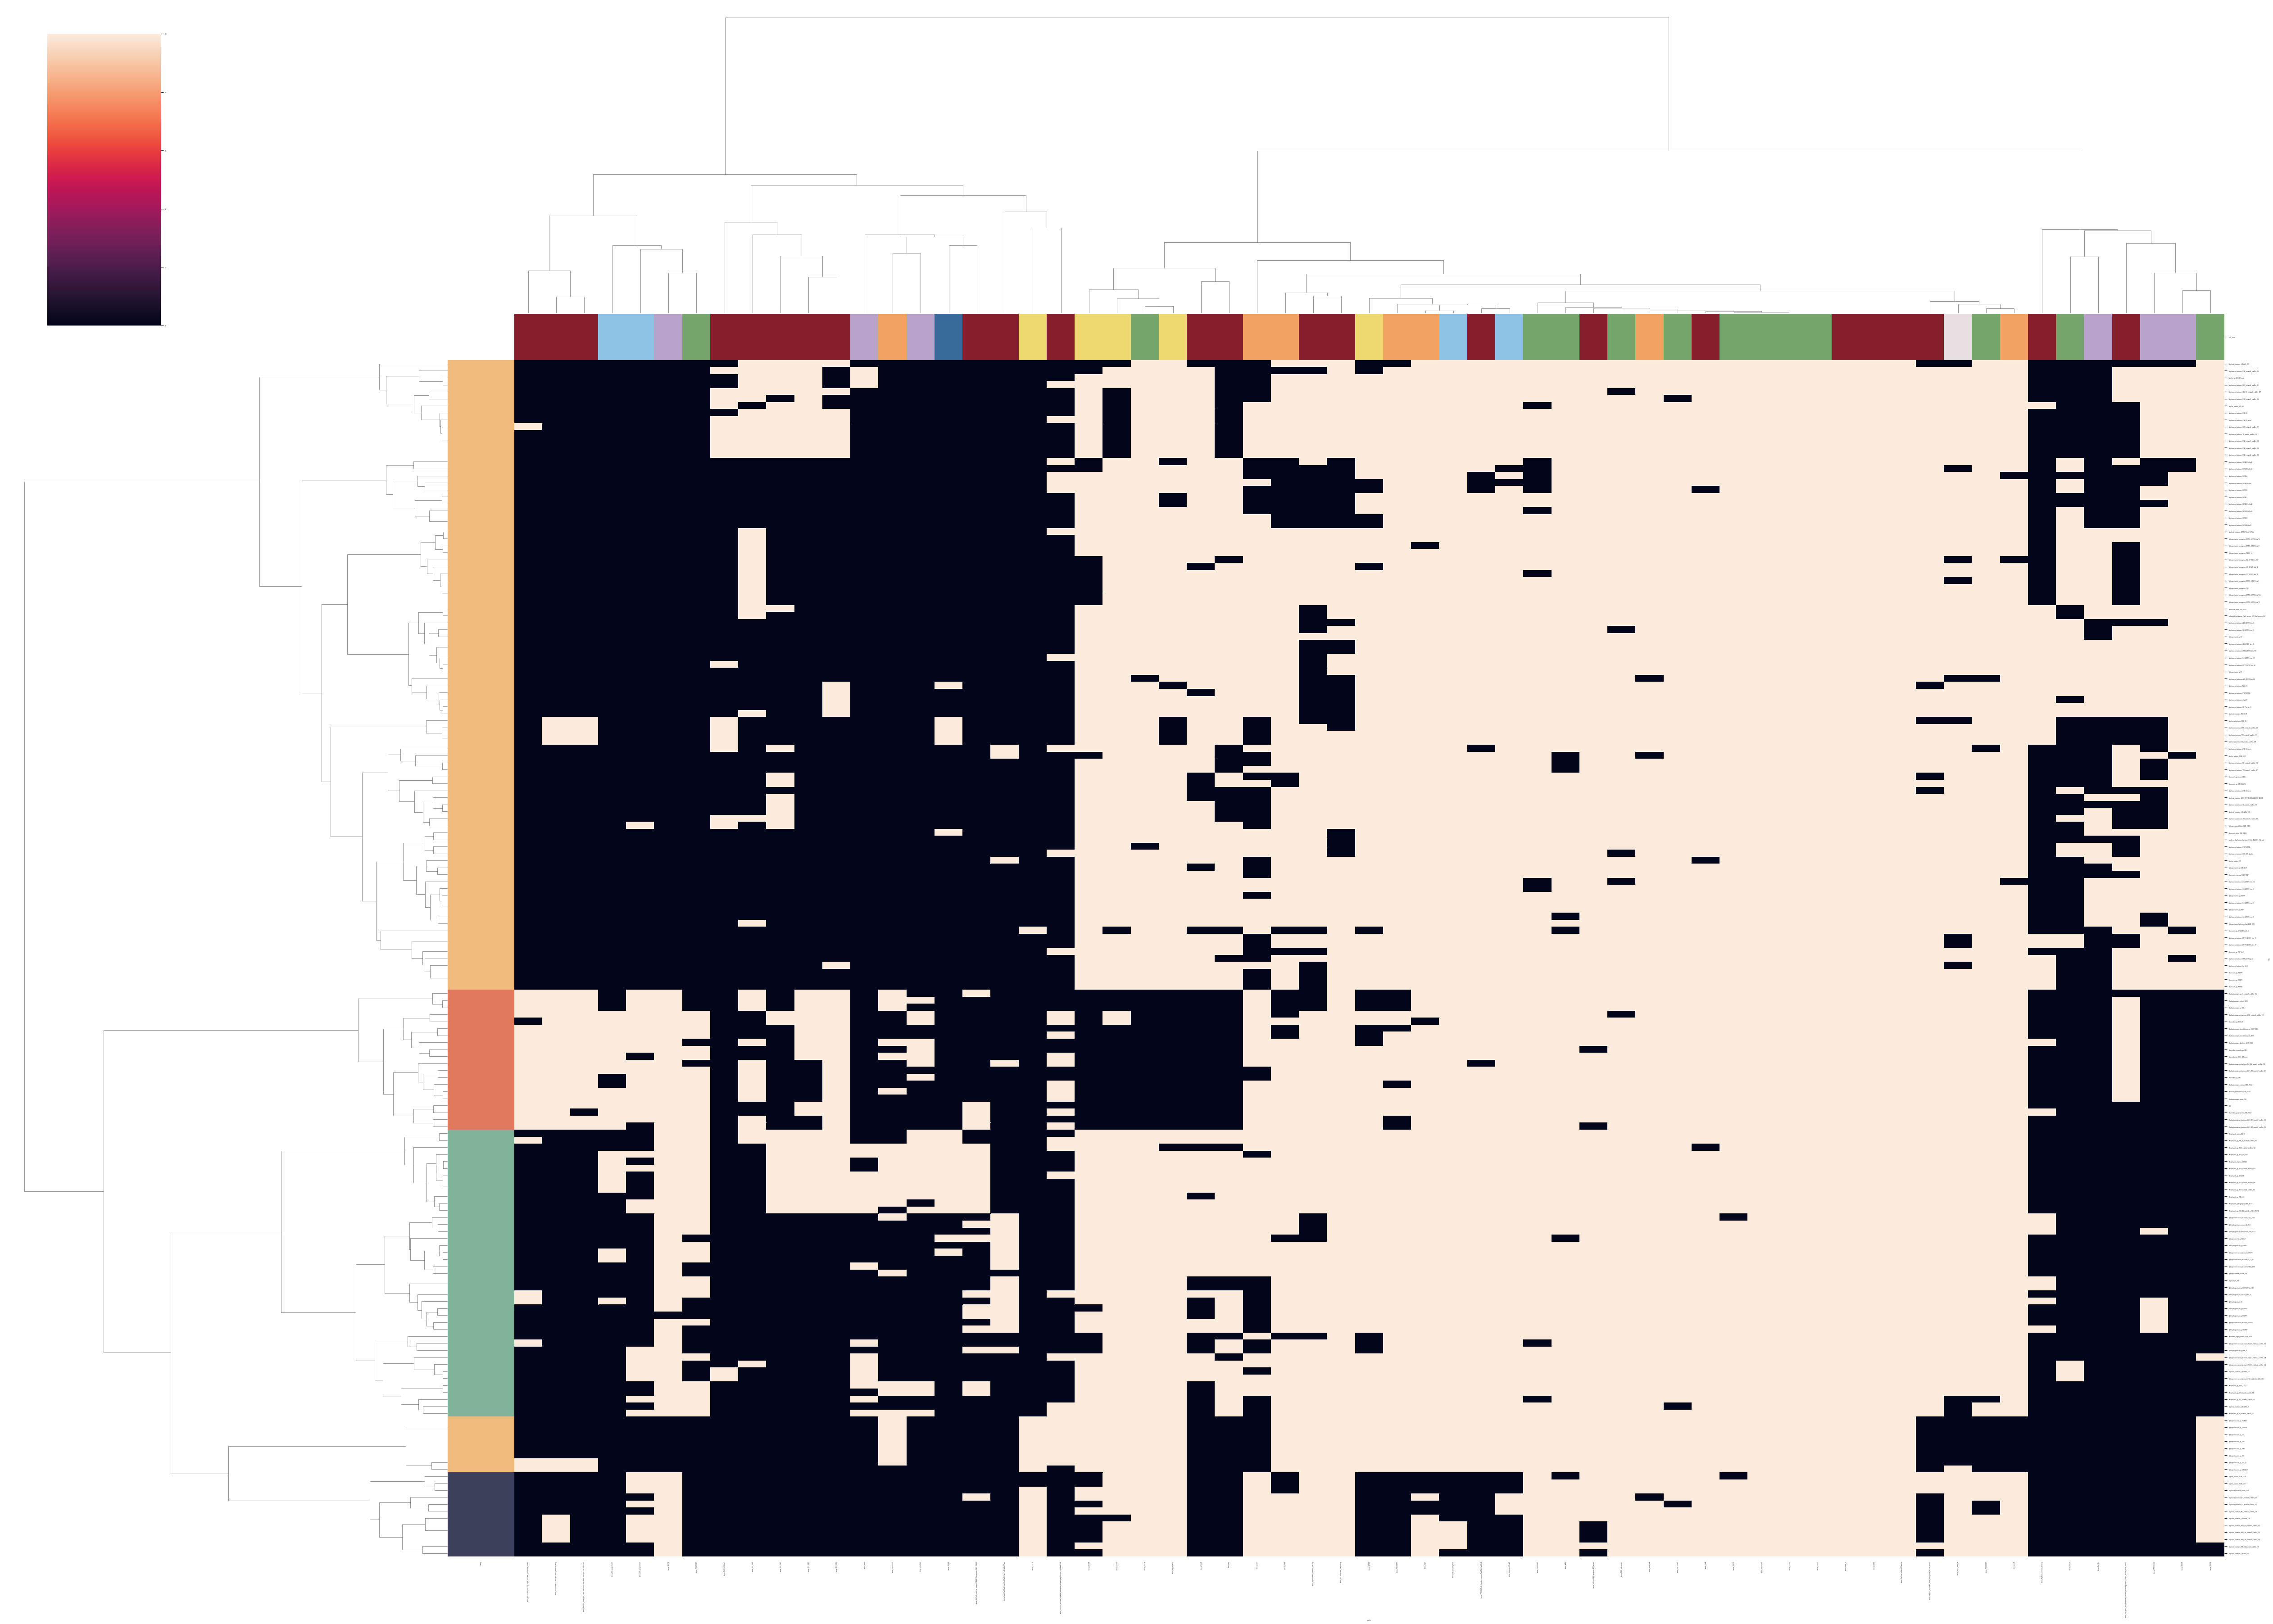

In [65]:
# Select columns that contain at least PRESENCE_THR counts
non_zero_columns = heat_df_selected.columns[
    (heat_df_selected == 1).mean() >= PRESENCE_THR
]
heat_df_selected_nonzero = heat_df_selected[non_zero_columns]

clustermap(
    data=heat_df_selected_nonzero,
    method=CLUSTERMAP_METHOD,
    metric=CLUSTERMAP_METRIC,
    row_colors=family_colors,
    col_colors=cycle_colors,
    figsize=(70, 50)
)
plt.savefig(
    os.path.join(
        DATA_DIR,
        f"heatmap-{'-'.join(selected_models)}.svg"
    ),
    # dpi=200
)

## Cycles

[ERROR] No observations for cycle Arsenic
[+] Clustermap for cycle Carbon


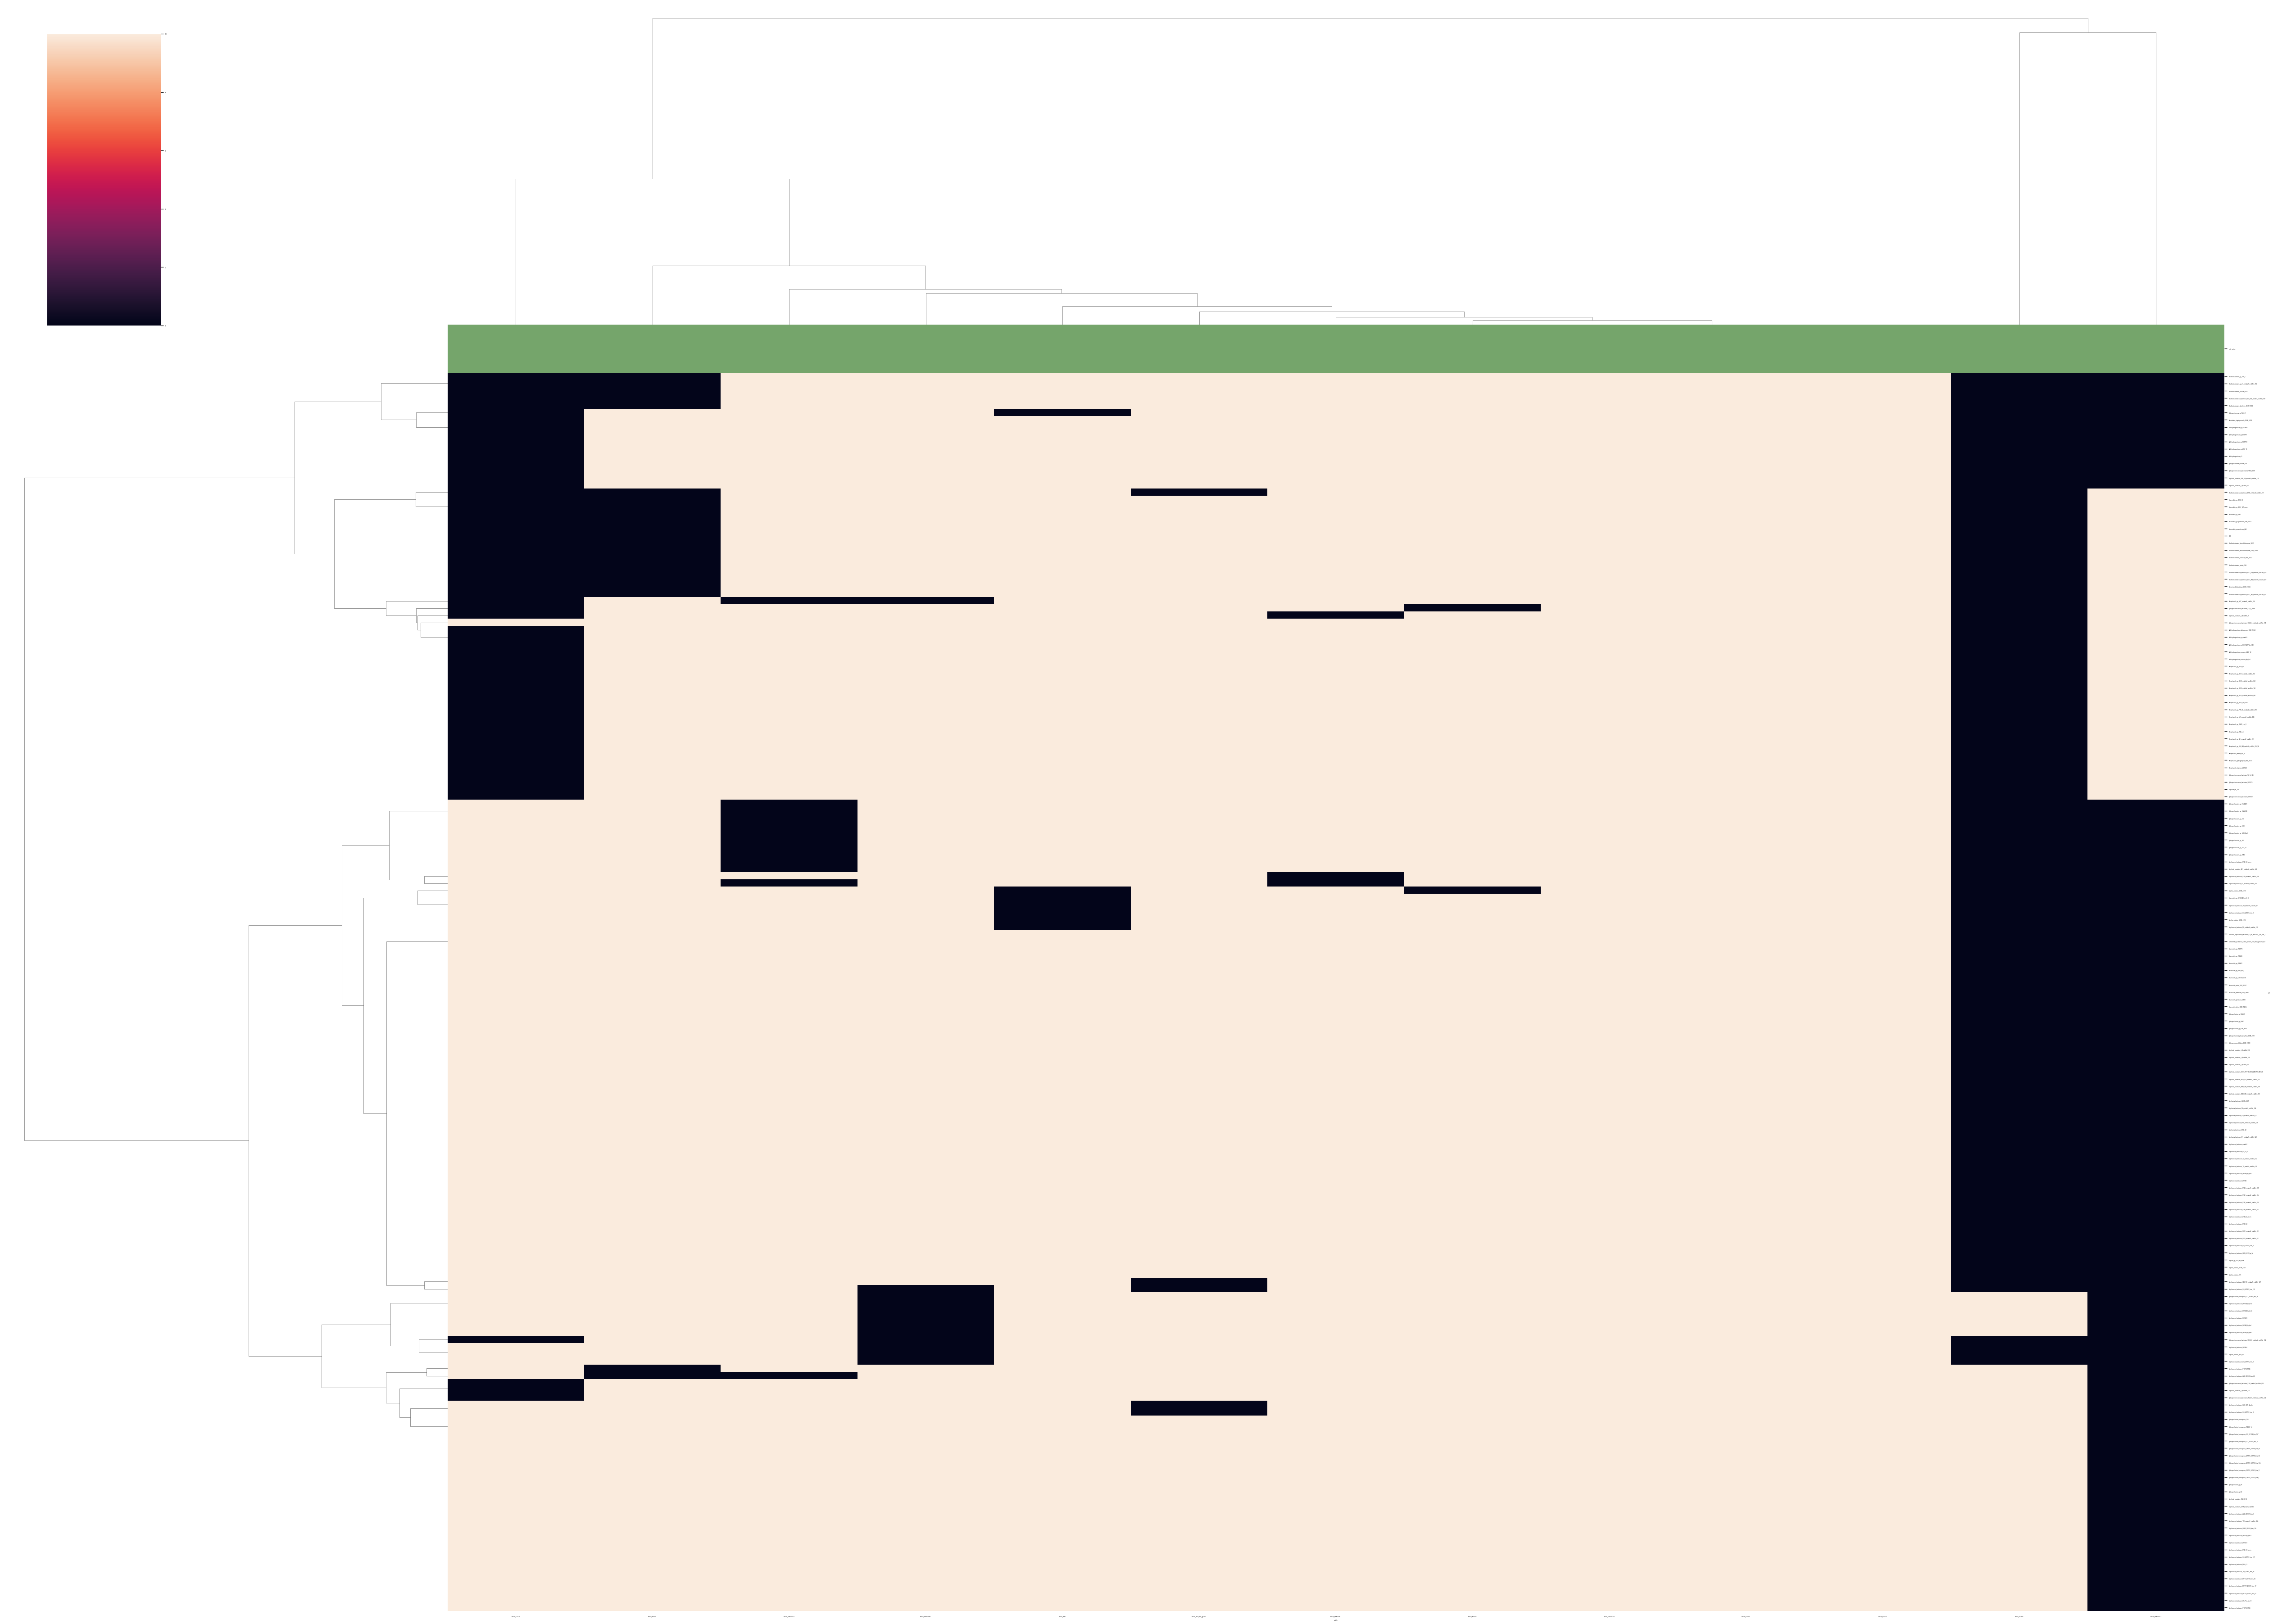

[ERROR] No observations for cycle Methane
[ERROR] No observations for cycle Nitrogen
[+] Clustermap for cycle Oxygen


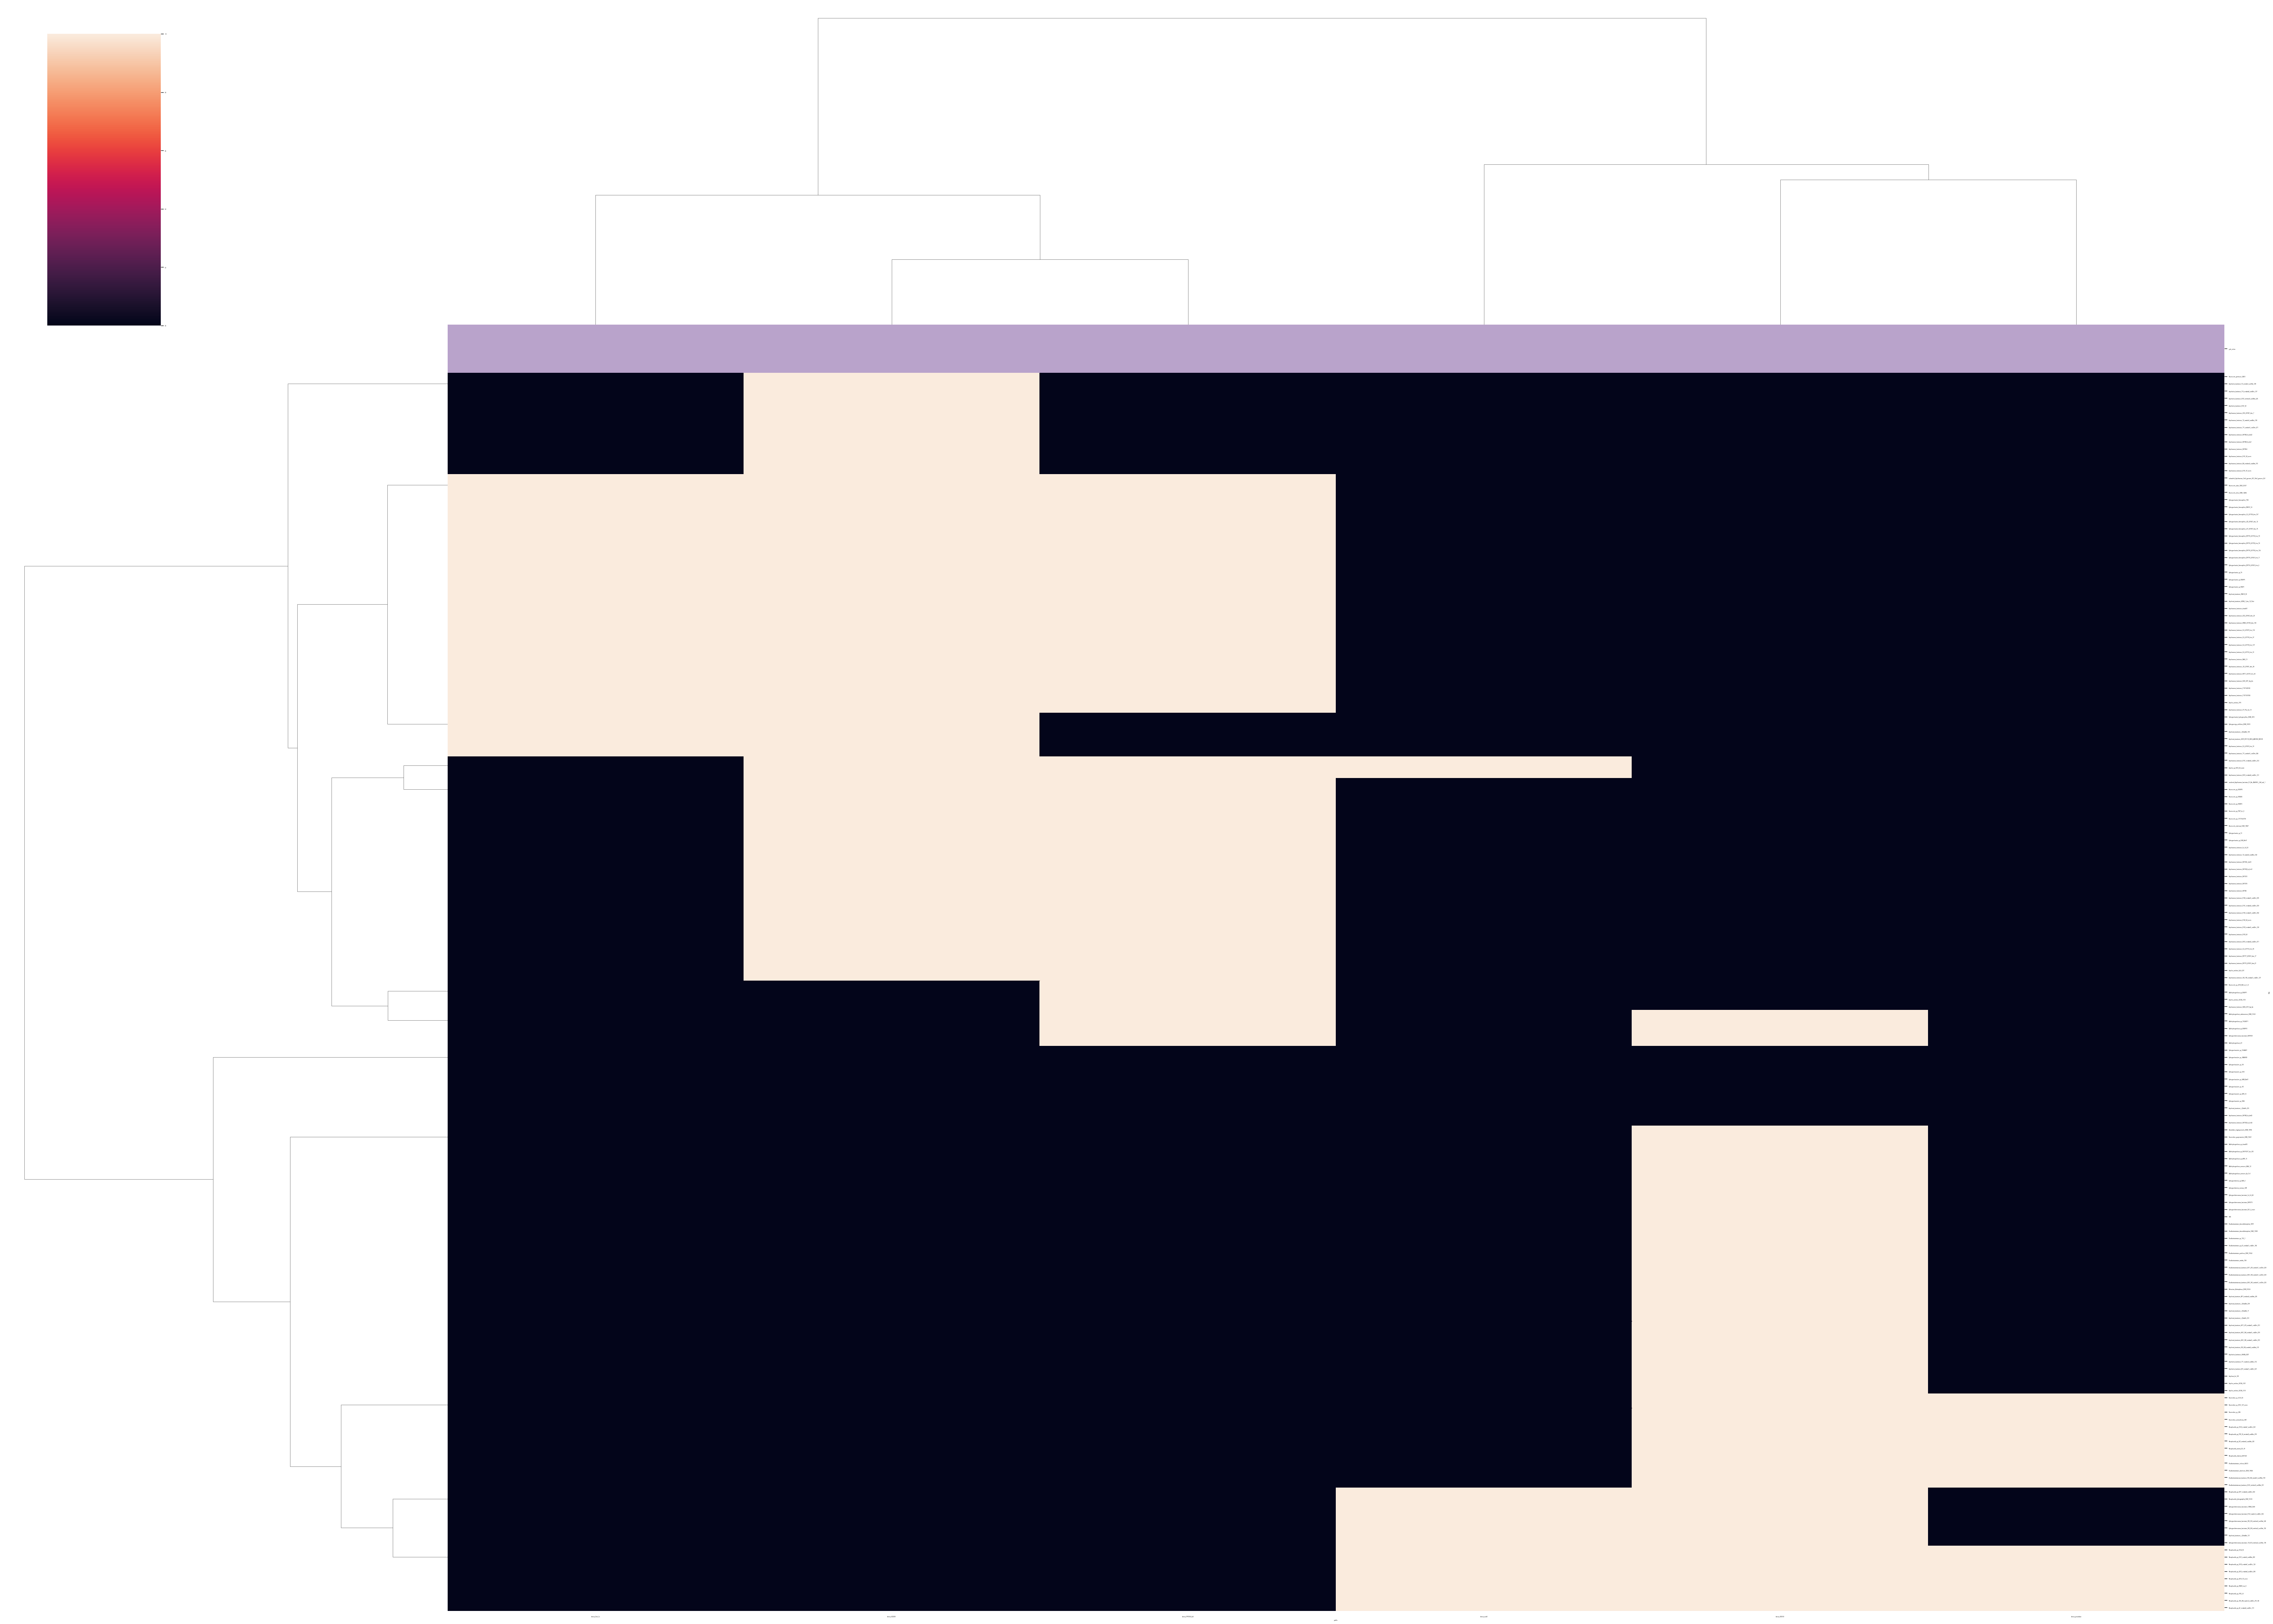

[ERROR] No observations for cycle Photosynthesis
[+] Clustermap for cycle Sulfur


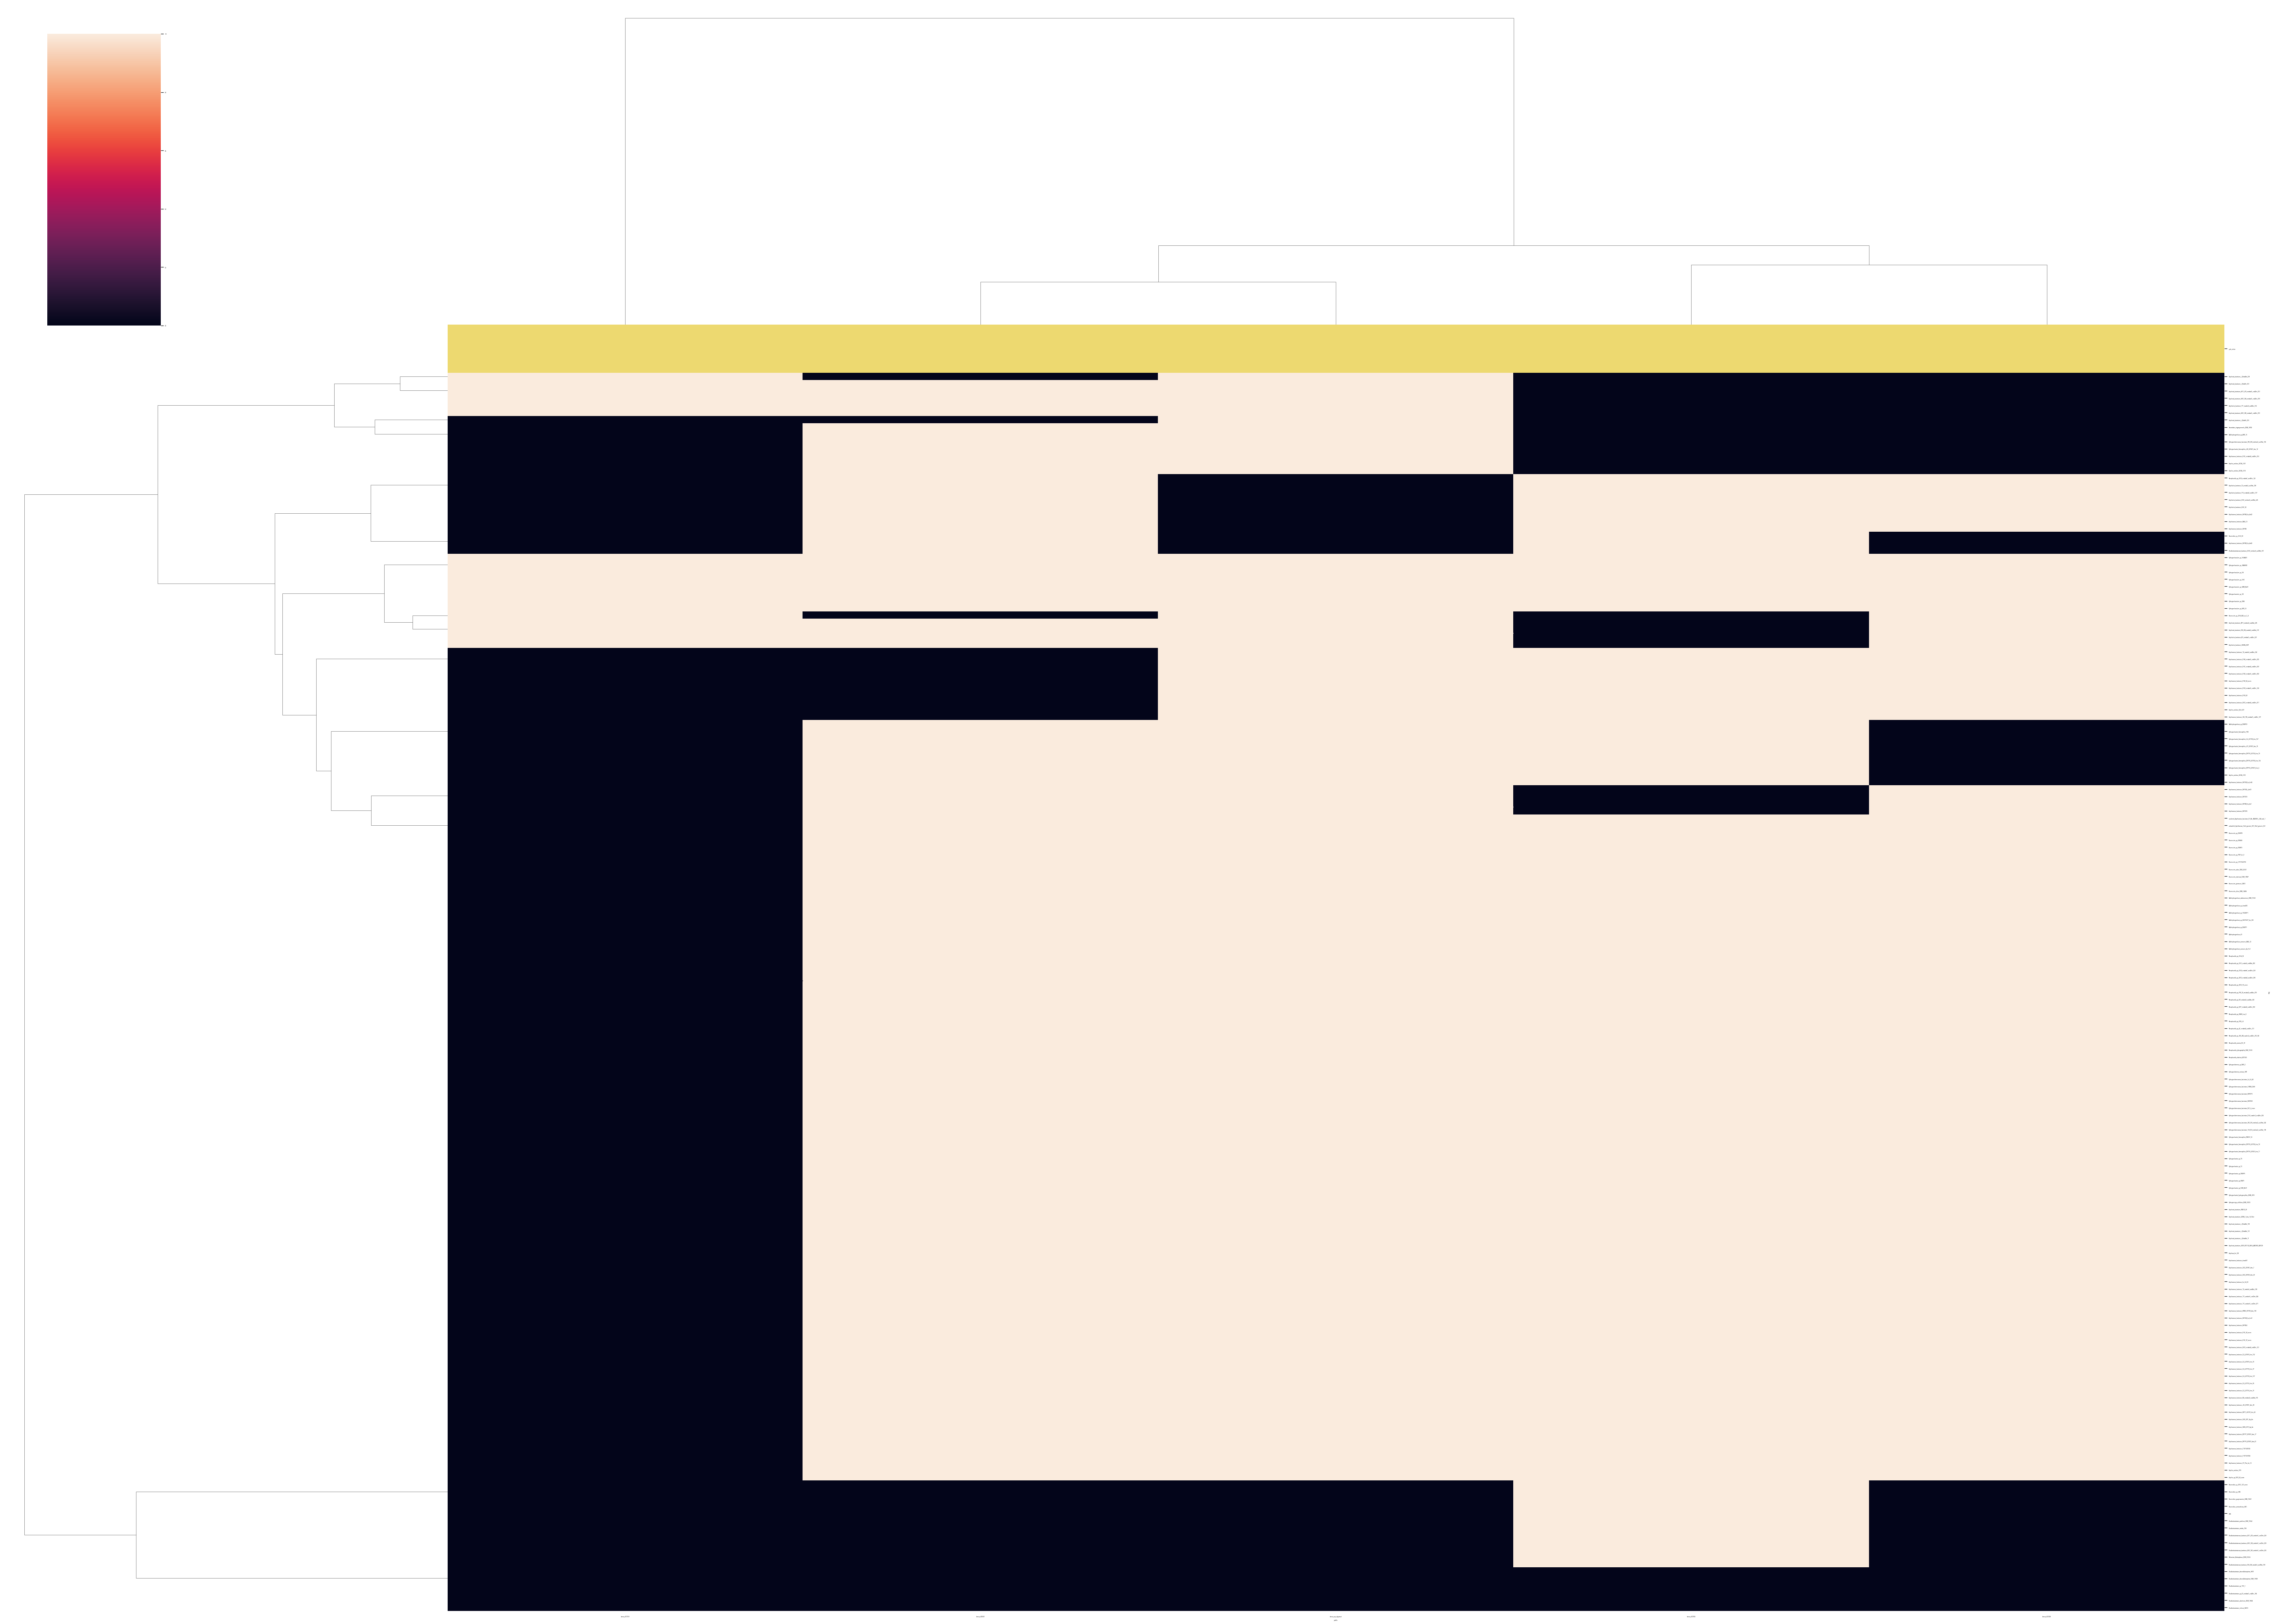

[+] Clustermap for cycle Transporters


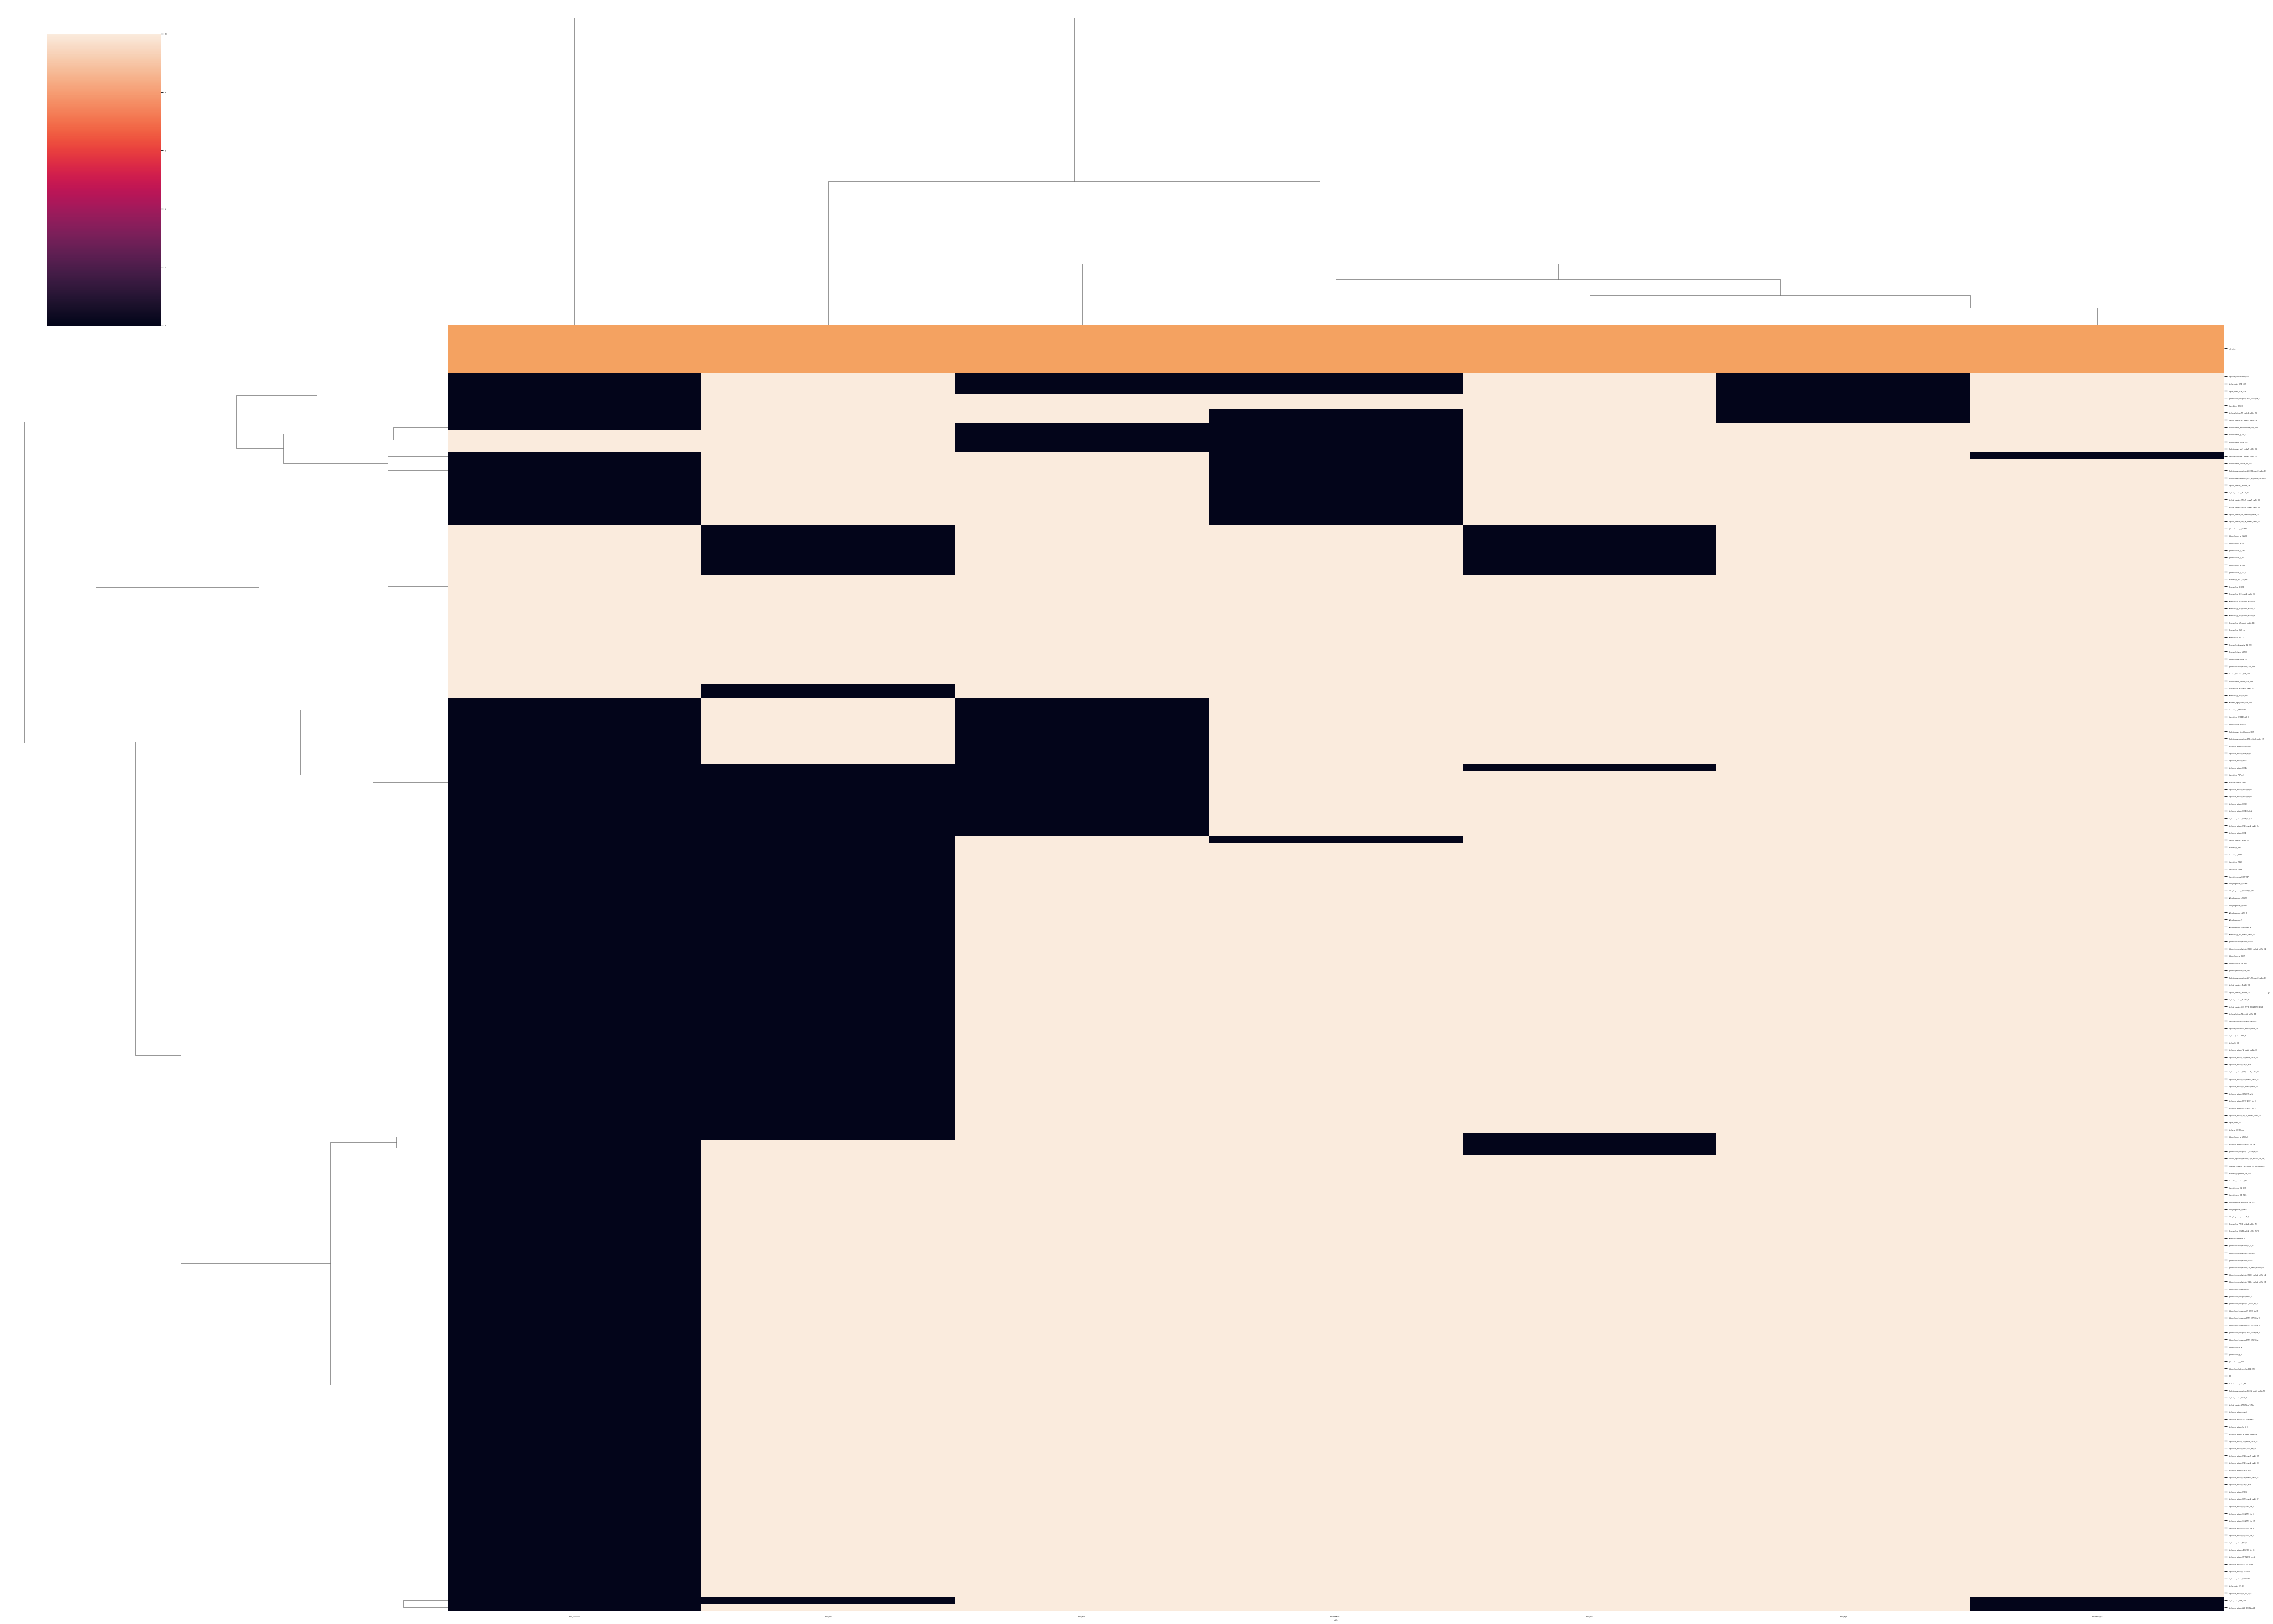

[+] Clustermap for cycle Hydrogen


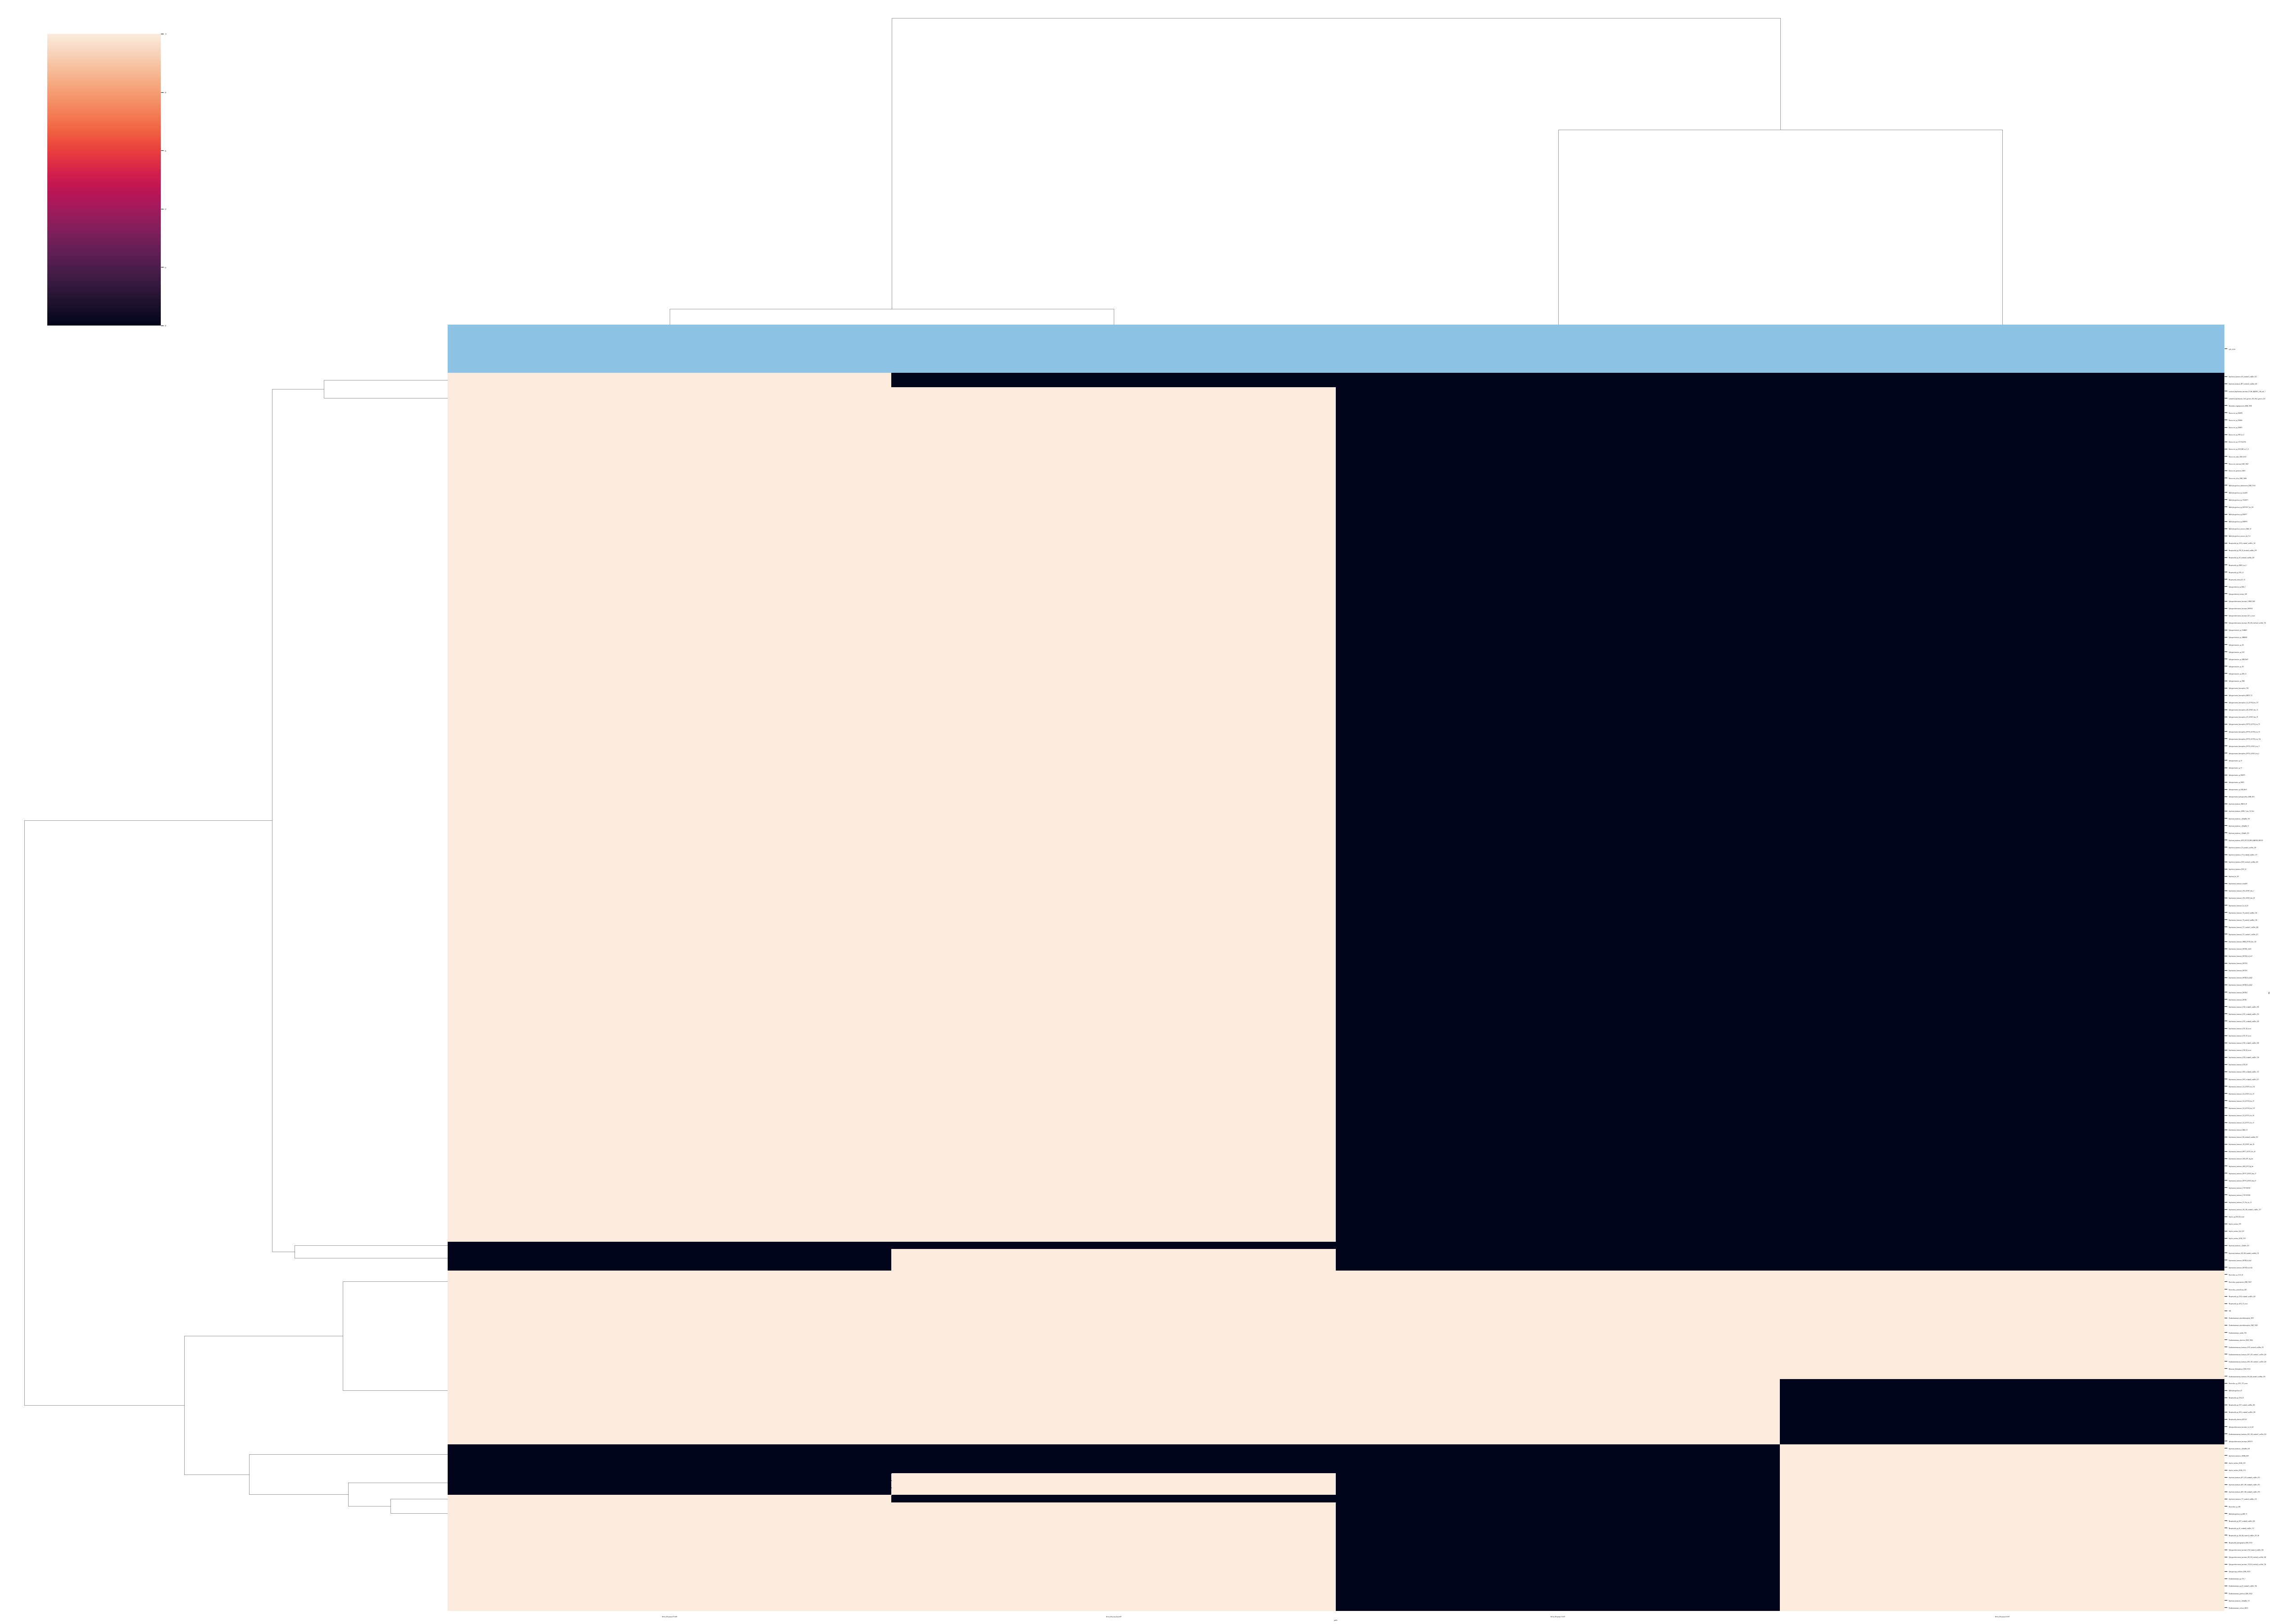

[ERROR] No observations for cycle Selenium
[+] Clustermap for cycle Iron


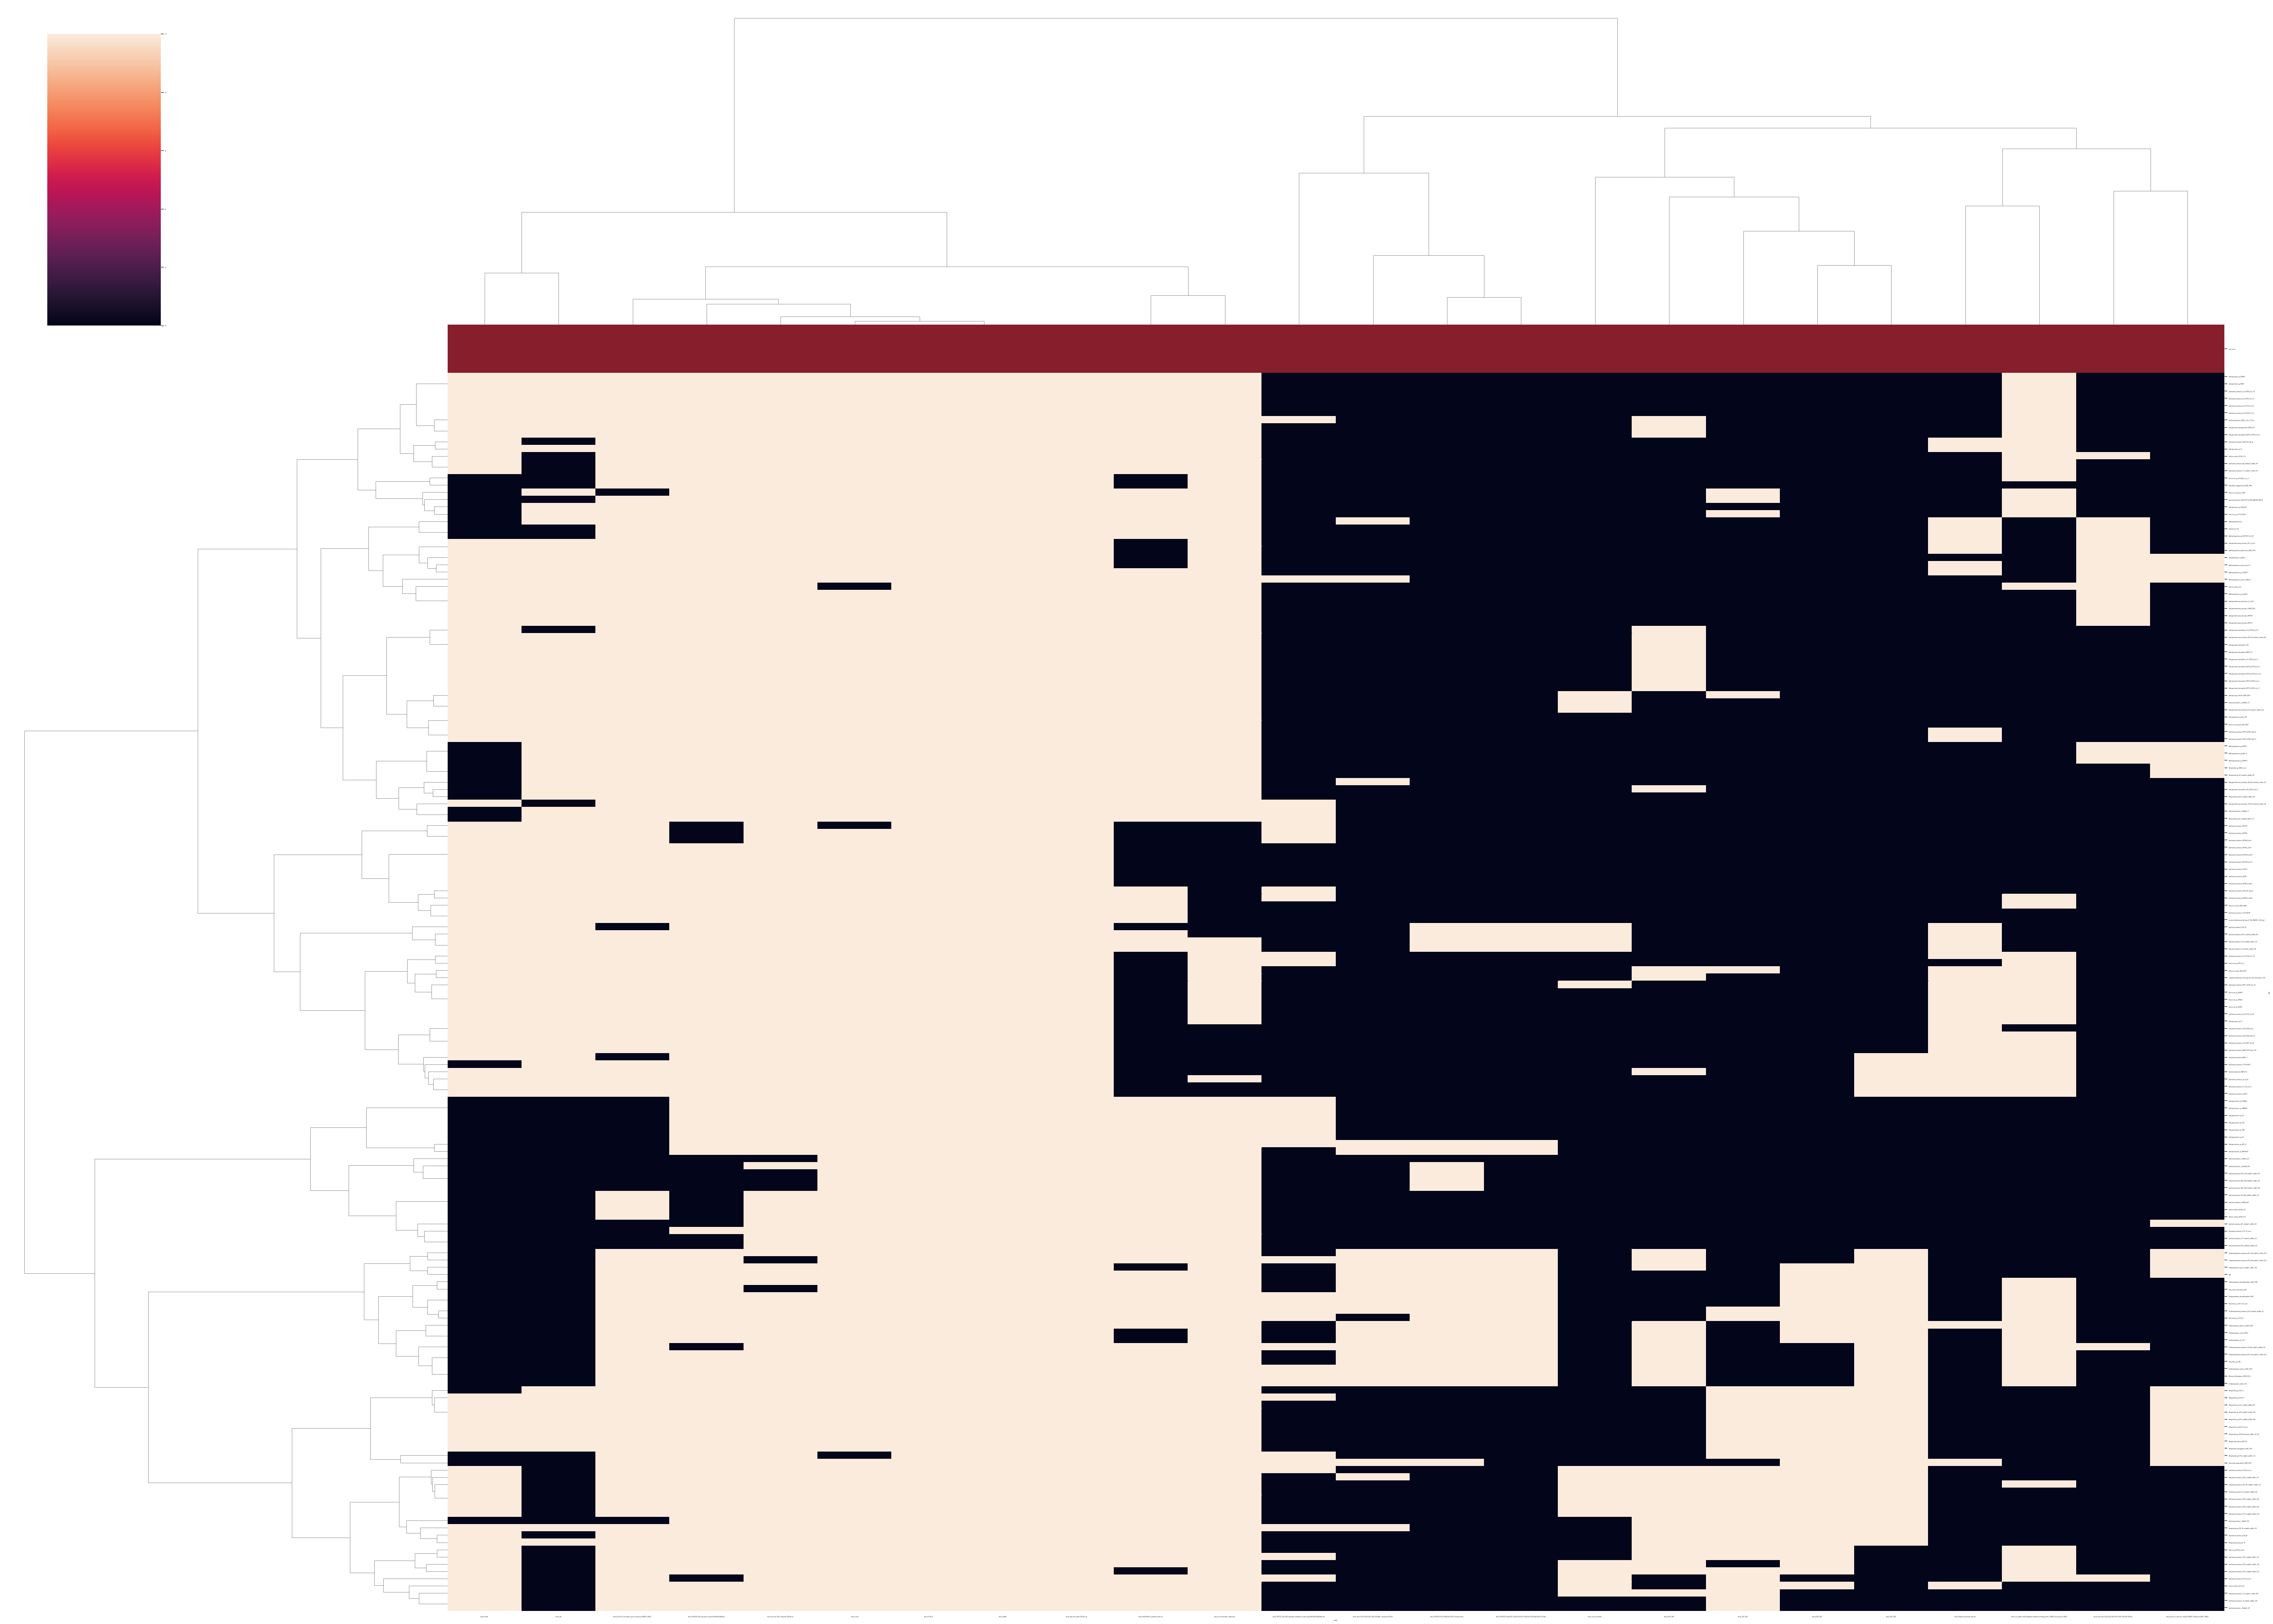

In [61]:
for cycle in metadata_df["Cycle"].unique():

    cycle_hmm_models = metadata_df[
        metadata_df["Cycle"] == cycle
    ]["hmm_model"].unique()

    heat_df_cycle = heat_df_selected_nonzero[[
        col for col in heat_df_selected_nonzero.columns
        if col in cycle_hmm_models
    ]]

    if len(heat_df_cycle.columns) >= 2:
        print(f"[+] Clustermap for cycle {cycle}")
        sns.clustermap(
            data=heat_df_cycle,
            method=CLUSTERMAP_METHOD,
            metric=CLUSTERMAP_METRIC,
            col_colors=cycle_colors,
            figsize=(70, 50)
        )
        plt.savefig(
            os.path.join(
                DATA_DIR,
                f"heatmap-{'-'.join(selected_models)}-{cycle.lower()}.svg"
            ),
            # dpi=600
        )
        plt.show()

    else:
        print(f"[ERROR] No observations for cycle {cycle}")
